# Impact of Environmental, Social And Governance News on the Stock Market Indices

In [1]:
#Import packages
import numpy as np
!pip install pandas
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas-datareader
import pandas_datareader
import datetime
import pandas_datareader.data as web
import requests

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
!pip install TextBlob
from textblob import TextBlob

from pandas_datareader import data as pdr
!pip install yfinance
import yfinance

import scipy.stats as stats
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')

!pip install wordcloud
from wordcloud import WordCloud
import re

#Use VADER
!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import os

!pip install feedparser
import feedparser as fp
import json

!pip install newspaper3k
import newspaper
from newspaper import Article
from time import mktime

from datetime import datetime, timedelta
import time
import pprint

%matplotlib inline

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from PIL import Image
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import os

!pip install feedparser
import feedparser as fp
import json

!pip install newspaper3k
import newspaper
from newspaper import Article
from time import mktime

from datetime import datetime, timedelta
import time
import pprint

import nltk
nltk.download('vader_lexicon')

import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta

import glob

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[nltk_data] Downloading package stopwords to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package wordnet to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package vader_lexicon to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#This will be used when creating graphs to order the days and months
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_month = ['January','February','March','April','May','June','July','August','September','October','November','December']

## Loading Data

### Stock Indices Data

#### FTSE 100

In [3]:
ftse = pd.read_csv('FTSE 100 Historical Data.csv')
ftse.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 31, 2019","7,542.44","7,587.05","7,587.41","7,532.38",212.14M,-0.59%
1,"Dec 30, 2019","7,587.05","7,644.90","7,644.90","7,587.05",304.24M,-0.76%
2,"Dec 27, 2019","7,644.90","7,632.24","7,665.40","7,622.46",311.11M,0.17%
3,"Dec 24, 2019","7,632.24","7,623.59","7,636.16","7,608.22",185.67M,0.11%
4,"Dec 23, 2019","7,623.59","7,582.48","7,628.20","7,559.63",539.14M,0.54%


In [4]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1010 non-null   object
 1   Price   1010 non-null   object
 2   Open    1010 non-null   object
 3   High    1010 non-null   object
 4   Low     1010 non-null   object
 5   Volume  1010 non-null   object
 6   Chg%    1010 non-null   object
dtypes: object(7)
memory usage: 55.4+ KB


In [5]:
ftse.describe()

,Date,Price,Open,High,Low,Volume,Chg%
count,1010,1010,1010,1010,1010,1010,1010
unique,1010,1006,1006,1008,1001,920,313
top,"Jun 29, 2016","7,328.92","7,328.92","7,180.71","6,036.70",1.01B,-0.15%
freq,1,2,2,2,2,10,11


In [6]:
#use yfinance and pandas data reader to import the S&P500 index values 
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start='2016, 01, 1', 
                          end='2019, 12, 31')
SP500.reset_index(inplace=True)
SP500.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941
1,2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2,2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
3,2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
4,2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966


In [7]:
SP500.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.000000
mean,2560.390457,2538.246376,2549.895392,2550.228200,3.616929e+09,2550.228200
std,334.291490,332.708884,333.440880,333.353202,6.783592e+08,333.353202
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2271.895020,2258.625000,2267.295044,2265.189941,3.230565e+09,2265.189941
50%,2627.689941,2585.889893,2602.659912,2602.419922,3.511530e+09,2602.419922
75%,2829.949951,2803.724976,2818.545044,2817.330078,3.871780e+09,2817.330078
max,3247.929932,3234.370117,3247.229980,3240.020020,7.609010e+09,3240.020020


In [8]:
#Import the exchange rate dataset for AUD/USD
FXUSD = pd.read_csv('USD_GBP Historical Data.csv')
FXUSD.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 31, 2019",1.3261,1.3117,1.3285,1.3106,97.86K,1.11%
1,"Dec 30, 2019",1.3115,1.3067,1.3152,1.3066,100.82K,0.29%
2,"Dec 27, 2019",1.3077,1.2993,1.3118,1.2967,85.56K,0.65%
3,"Dec 26, 2019",1.2993,1.2961,1.3016,1.2951,99.65K,0.25%
4,"Dec 25, 2019",1.2961,1.2942,1.2989,1.2918,34.43K,0.12%


In [9]:
FXUSD.describe()

,Price,Open,High,Low
count,1042.000000,1042.000000,1042.000000,1042.000000
mean,1.314114,1.314188,1.319984,1.308206
std,0.063706,0.063918,0.064487,0.063344
min,1.203700,1.204400,1.209000,1.145200
25%,1.271900,1.272300,1.275925,1.266300
50%,1.303350,1.303200,1.308550,1.298500
75%,1.338425,1.338600,1.344475,1.333100
max,1.487900,1.487200,1.502000,1.473900


<b> <u> Comments</u> </b>
<br>
FTSE 100 data and  USD/GBP exchange rate was obtained from investing.com[9][11] and S&P500 information uses the yfinance and pandas datareader package[12][13].


### News Data

In [10]:
guardian_api = '8ca75031-03ce-4640-80b3-9accc793d8e6'

In [243]:
ARTICLES_DIR = join('tempdata', 'newsarticles') #Create a temporary directory to save the news articles
makedirs(ARTICLES_DIR, exist_ok=True)
# Sample URL - obtained from guardian to search for news articles
#
# http://content.guardianapis.com/search?q=news
# &api-key=your-api-key-goes-here

API_ENDPOINT = 'http://content.guardianapis.com/search?q=news'
my_params = {
    'from-date': "2016-01-01",
    'to-date': "2019-12-31",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': guardian_api
}

In [244]:
my_params

{'from-date': '2016-01-01',
 'to-date': '2019-12-31',
 'order-by': 'newest',
 'show-fields': 'all',
 'page-size': 200,
 'api-key': '8ca75031-03ce-4640-80b3-9accc793d8e6'}

In [13]:

start_date = date(2016, 1, 1)
end_date = date(2019,12, 31) #ONLY ALLOWED 5,000 API REQUESTS SO SPLIT INTO BATCHES
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2)) #create separate json files for each day and save it in the tempdata/articles/ folder

## Read in the JSON files 

In [14]:
#Find names of all files in the folder tempdata/newsarticles/ with the extension .json
pattern = 'tempdata/newsarticles/*.json'

json_files = glob.glob(pattern)

print(json_files)

['tempdata/newsarticles\\2016-01-01.json', 'tempdata/newsarticles\\2016-01-02.json', 'tempdata/newsarticles\\2016-01-03.json', 'tempdata/newsarticles\\2016-01-04.json', 'tempdata/newsarticles\\2016-01-05.json', 'tempdata/newsarticles\\2016-01-06.json', 'tempdata/newsarticles\\2016-01-07.json', 'tempdata/newsarticles\\2016-01-08.json', 'tempdata/newsarticles\\2016-01-09.json', 'tempdata/newsarticles\\2016-01-10.json', 'tempdata/newsarticles\\2016-01-11.json', 'tempdata/newsarticles\\2016-01-12.json', 'tempdata/newsarticles\\2016-01-13.json', 'tempdata/newsarticles\\2016-01-14.json', 'tempdata/newsarticles\\2016-01-15.json', 'tempdata/newsarticles\\2016-01-16.json', 'tempdata/newsarticles\\2016-01-17.json', 'tempdata/newsarticles\\2016-01-18.json', 'tempdata/newsarticles\\2016-01-19.json', 'tempdata/newsarticles\\2016-01-20.json', 'tempdata/newsarticles\\2016-01-21.json', 'tempdata/newsarticles\\2016-01-22.json', 'tempdata/newsarticles\\2016-01-23.json', 'tempdata/newsarticles\\2016-01-2

In [15]:
json2 = pd.read_json(json_files[1])

In [16]:
json2

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,artanddesign/2016/jan/02/your-pictures-share-y...,article,artanddesign,Art and design,2016-01-02T22:35:19Z,Your pictures: share your photos on the theme ...,https://www.theguardian.com/artanddesign/2016/...,https://content.guardianapis.com/artanddesign/...,{'headline': 'Your pictures: share your photos...,False,pillar/arts,Arts
1,football/live/2016/jan/02/watford-v-manchester...,liveblog,football,Football,2016-01-02T19:25:27Z,Watford v Manchester City: Premier League – as...,https://www.theguardian.com/football/live/2016...,https://content.guardianapis.com/football/live...,{'headline': 'Watford v Manchester City: Premi...,False,pillar/sport,Sport
2,us-news/2016/jan/02/new-jersey-newspaper-edito...,article,us-news,US news,2016-01-02T18:58:22Z,Two New Jersey newspapers denounce Chris Chris...,https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,{'headline': 'Two New Jersey newspapers denoun...,False,pillar/news,News
3,football/2016/jan/02/steve-gohouri-found-dead-...,article,football,Football,2016-01-02T18:41:38Z,Former Ivory Coast defender Steve Gohouri foun...,https://www.theguardian.com/football/2016/jan/...,https://content.guardianapis.com/football/2016...,{'headline': 'Former Ivory Coast defender Stev...,False,pillar/sport,Sport
4,football/blog/2016/jan/02/anthony-martial-wayn...,article,football,Football,2016-01-02T18:14:36Z,Anthony Martial and Wayne Rooney prove Manches...,https://www.theguardian.com/football/blog/2016...,https://content.guardianapis.com/football/blog...,{'headline': 'Anthony Martial and Wayne Rooney...,False,pillar/sport,Sport
5,football/live/2016/jan/02/manchester-united-v-...,liveblog,football,Football,2016-01-02T17:40:17Z,"Manchester United 2-1 Swansea, Espanyol 0-0 Ba...",https://www.theguardian.com/football/live/2016...,https://content.guardianapis.com/football/live...,"{'headline': 'Manchester United 2-1 Swansea, E...",False,pillar/sport,Sport
6,world/live/2016/jan/02/middle-east-condemns-sa...,liveblog,world,World news,2016-01-02T16:55:37Z,Execution of Shia cleric sparks international ...,https://www.theguardian.com/world/live/2016/ja...,https://content.guardianapis.com/world/live/20...,{'headline': 'Execution of Shia cleric sparks ...,False,pillar/news,News
7,sport/2016/jan/02/lizzie-kelly-tea-for-two-box...,article,sport,Sport,2016-01-02T16:50:08Z,Lizzie Kelly: The only person who really belie...,https://www.theguardian.com/sport/2016/jan/02/...,https://content.guardianapis.com/sport/2016/ja...,{'headline': 'Lizzie Kelly: The only person wh...,False,pillar/sport,Sport
8,sport/live/2016/jan/02/south-africa-v-england-...,liveblog,sport,Sport,2016-01-02T16:09:02Z,"South Africa v England: second Test, day one –...",https://www.theguardian.com/sport/live/2016/ja...,https://content.guardianapis.com/sport/live/20...,{'headline': 'South Africa v England: second T...,False,pillar/sport,Sport
9,football/live/2016/jan/02/west-ham-v-liverpool...,liveblog,football,Football,2016-01-02T14:54:31Z,West Ham United 2-0 Liverpool: Premier League ...,https://www.theguardian.com/football/live/2016...,https://content.guardianapis.com/football/live...,{'headline': 'West Ham United 2-0 Liverpool: P...,False,pillar/sport,Sport


In [17]:
frames = []

#iterate over json_files

for json in json_files:
    #read json into a dataframe called newsdata 
    newsdata = pd.read_json(json)
    
    #append newsdata to frames
    frames.append(newsdata)
    print('appending...')

#Concatenate frames into a single dataframe called news articles
newsarticles = pd.concat(frames)

#Print the shape of newsarticles
print(newsarticles.shape)
print('completed framing')

appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...

appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...

appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...

In [18]:
newsarticles.head(50)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,us-news/2016/jan/01/tamir-rice-protest-clevela...,article,us-news,US news,2016-01-01T22:44:12Z,Tamir Rice protesters picket house of Clevelan...,https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,{'headline': 'Tamir Rice protesters picket hou...,False,pillar/news,News
1,sport/2016/jan/01/itv-win-rights-racing-channel-4,article,sport,Sport,2016-01-01T22:18:11Z,ITV wins terrestrial rights to show racing fro...,https://www.theguardian.com/sport/2016/jan/01/...,https://content.guardianapis.com/sport/2016/ja...,{'headline': 'ITV wins terrestrial rights to s...,False,pillar/sport,Sport
2,us-news/2016/jan/01/natalie-cole-singer-and-da...,article,us-news,US news,2016-01-01T21:45:07Z,"Natalie Cole, singer and daughter of Nat King ...",https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,"{'headline': 'Natalie Cole, singer and daughte...",False,pillar/news,News
3,us-news/2016/jan/01/carly-fiorina-rose-bowl-st...,article,us-news,US news,2016-01-01T21:40:36Z,Carly Fiorina tweets support for alma mater's ...,https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,{'headline': 'Carly Fiorina tweets support for...,False,pillar/news,News
4,world/2016/jan/01/slowdown-in-chinese-manufact...,article,business,Business,2016-01-01T18:41:33Z,Slowdown in Chinese manufacturing deepens fear...,https://www.theguardian.com/world/2016/jan/01/...,https://content.guardianapis.com/world/2016/ja...,{'headline': 'Slowdown in Chinese manufacturin...,False,pillar/news,News
5,media/2016/jan/01/some-new-year-resolutions-fo...,article,media,Media,2016-01-01T18:26:46Z,Some New Year resolutions for the Guardian | L...,https://www.theguardian.com/media/2016/jan/01/...,https://content.guardianapis.com/media/2016/ja...,{'headline': 'Some New Year resolutions for th...,False,pillar/news,News
6,uk-news/2016/jan/01/damehood-for-professor-til...,article,uk-news,UK news,2016-01-01T18:26:03Z,Damehood for Professor Til Wykes is a recognit...,https://www.theguardian.com/uk-news/2016/jan/0...,https://content.guardianapis.com/uk-news/2016/...,{'headline': 'Damehood for Professor Til Wykes...,False,pillar/news,News
7,culture/2016/jan/01/shakespeare-to-lift-the-so...,article,culture,Culture,2016-01-01T18:22:46Z,Shakespeare to lift the soul and the emotions ...,https://www.theguardian.com/culture/2016/jan/0...,https://content.guardianapis.com/culture/2016/...,{'headline': 'Shakespeare to lift the soul and...,False,pillar/arts,Arts
8,guardian-observer-style-guide-f,article,info,Info,2016-01-01T17:47:00Z,Guardian and Observer style guide: F,https://www.theguardian.com/guardian-observer-...,https://content.guardianapis.com/guardian-obse...,{'headline': 'Guardian and Observer style guid...,False,pillar/news,News
9,commentisfree/2016/jan/01/the-guardian-view-on...,article,commentisfree,Opinion,2016-01-01T17:41:46Z,The Guardian view on statistical misperception...,https://www.theguardian.com/commentisfree/2016...,https://content.guardianapis.com/commentisfree...,{'headline': 'The Guardian view on statistical...,False,pillar/opinion,Opinion


In [19]:
# Check if there are missing values in the dataset
newsarticles['id'].isna().sum()

0

In [20]:
newsarticles.shape[0]

print('There are',newsarticles.shape[0],'rows and',newsarticles.shape[1],'columns')

There are 67668 rows and 12 columns


## Processing Data

### Cleaning Data

#### News Dataset

In [21]:
newsarticles['pillarName'].unique()

array(['News', 'Sport', 'Arts', 'Opinion', nan, 'Lifestyle'], dtype=object)

In [22]:
#Only keep values where the pillarName = 'News'
newsarticles2 = newsarticles[newsarticles['pillarName'] == 'News']
newsarticles2.shape

(40320, 12)

In [23]:
newsarticles2.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,us-news/2016/jan/01/tamir-rice-protest-clevela...,article,us-news,US news,2016-01-01T22:44:12Z,Tamir Rice protesters picket house of Clevelan...,https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,{'headline': 'Tamir Rice protesters picket hou...,False,pillar/news,News
2,us-news/2016/jan/01/natalie-cole-singer-and-da...,article,us-news,US news,2016-01-01T21:45:07Z,"Natalie Cole, singer and daughter of Nat King ...",https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,"{'headline': 'Natalie Cole, singer and daughte...",False,pillar/news,News
3,us-news/2016/jan/01/carly-fiorina-rose-bowl-st...,article,us-news,US news,2016-01-01T21:40:36Z,Carly Fiorina tweets support for alma mater's ...,https://www.theguardian.com/us-news/2016/jan/0...,https://content.guardianapis.com/us-news/2016/...,{'headline': 'Carly Fiorina tweets support for...,False,pillar/news,News
4,world/2016/jan/01/slowdown-in-chinese-manufact...,article,business,Business,2016-01-01T18:41:33Z,Slowdown in Chinese manufacturing deepens fear...,https://www.theguardian.com/world/2016/jan/01/...,https://content.guardianapis.com/world/2016/ja...,{'headline': 'Slowdown in Chinese manufacturin...,False,pillar/news,News
5,media/2016/jan/01/some-new-year-resolutions-fo...,article,media,Media,2016-01-01T18:26:46Z,Some New Year resolutions for the Guardian | L...,https://www.theguardian.com/media/2016/jan/01/...,https://content.guardianapis.com/media/2016/ja...,{'headline': 'Some New Year resolutions for th...,False,pillar/news,News


In [24]:
newsarticles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40320 entries, 0 to 37
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  40320 non-null  object
 1   type                40320 non-null  object
 2   sectionId           40320 non-null  object
 3   sectionName         40320 non-null  object
 4   webPublicationDate  40320 non-null  object
 5   webTitle            40320 non-null  object
 6   webUrl              40320 non-null  object
 7   apiUrl              40320 non-null  object
 8   fields              40320 non-null  object
 9   isHosted            40320 non-null  bool  
 10  pillarId            40320 non-null  object
 11  pillarName          40320 non-null  object
dtypes: bool(1), object(11)
memory usage: 3.7+ MB


In [25]:
#Create a new dataframe which has the web publication date only
publicationdate = newsarticles2[['webPublicationDate']]
publicationdate.reset_index(drop = True, inplace = True)
publicationdate.head()

,webPublicationDate
0,2016-01-01T22:44:12Z
1,2016-01-01T21:45:07Z
2,2016-01-01T21:40:36Z
3,2016-01-01T18:41:33Z
4,2016-01-01T18:26:46Z


In [26]:
#Column fields has the relevant information required for this analysis
newsarticlesdf = newsarticles2['fields'].apply(pd.Series)
print(newsarticlesdf.shape)

(40320, 36)


In [27]:
#Reset index 
newsarticlesdf.reset_index(drop = True, inplace = True)
newsarticlesdf.head()

,headline,standfirst,trailText,byline,main,body,wordcount,commentCloseDate,commentable,firstPublicationDate,...,isLive,displayHint,liveBloggingNow,allowUgc,contributorBio,showAffiliateLinks,sensitive,membershipAccess,starRating,shouldHideReaderRevenue
0,Tamir Rice protesters picket house of Clevelan...,<ul><li>Crowd marks time before boy shot by po...,Crowd marks time before boy shot by police off...,Afi Scruggs in Cleveland,"<figure class=""element element-image"" data-med...","<p>Anger over the decision <a href=""http://www...",627,2016-01-04T22:45:00Z,true,2016-01-01T22:44:12Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Natalie Cole, singer and daughter of Nat King ...",<p>Singer’s family pay tribute to ‘fierce and ...,Singer’s family pay tribute to ‘fierce and cou...,"Matthew Taylor, Martin Pengelly and agencies","<figure class=""element element-video"" data-can...","<p><a href=""http://www.theguardian.com/culture...",728,2016-01-04T17:15:00Z,true,2016-01-01T17:17:40Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carly Fiorina tweets support for alma mater's ...,"<p>‘Love my alma mater,’ said the former Hewle...","‘Love my alma mater,’ said the former Hewlett-...",Martin Pengelly in New York,"<figure class=""element element-image"" data-med...",<p>The Republican presidential candidate Carly...,314,2016-01-04T20:45:00Z,true,2016-01-01T20:52:04Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Slowdown in Chinese manufacturing deepens fear...,<p>Factory activity cools for fifth month runn...,Factory activity cools for fifth month running...,Katie Allen,"<figure class=""element element-image"" data-med...",<p>A further slowdown in China’s vast manufact...,687,2016-01-04T18:45:00Z,true,2016-01-01T18:41:33Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Some New Year resolutions for the Guardian,NaN,<strong>Letters:</strong> There’s growing evid...,Letters,"<figure class=""element element-image"" data-med...","<p>It’s inspiring to read in the <a href=""http...",952,NaN,false,2016-01-01T18:26:46Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
newsarticlesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40320 entries, 0 to 40319
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   headline                       40320 non-null  object
 1   standfirst                     40004 non-null  object
 2   trailText                      40320 non-null  object
 3   byline                         39411 non-null  object
 4   main                           40320 non-null  object
 5   body                           40320 non-null  object
 6   wordcount                      40320 non-null  object
 7   commentCloseDate               14911 non-null  object
 8   commentable                    17013 non-null  object
 9   firstPublicationDate           40316 non-null  object
 10  isInappropriateForSponsorship  40145 non-null  object
 11  isPremoderated                 40320 non-null  object
 12  lastModified                   40320 non-null  object
 13  p

In [29]:
#Merge the publicationdate df with the newsarticles df to obtain the publication date of the article. 
newsarticlesdate = newsarticlesdf.merge(publicationdate,left_index = True, right_index = True)
newsarticlesdate.head()

,headline,standfirst,trailText,byline,main,body,wordcount,commentCloseDate,commentable,firstPublicationDate,...,displayHint,liveBloggingNow,allowUgc,contributorBio,showAffiliateLinks,sensitive,membershipAccess,starRating,shouldHideReaderRevenue,webPublicationDate
0,Tamir Rice protesters picket house of Clevelan...,<ul><li>Crowd marks time before boy shot by po...,Crowd marks time before boy shot by police off...,Afi Scruggs in Cleveland,"<figure class=""element element-image"" data-med...","<p>Anger over the decision <a href=""http://www...",627,2016-01-04T22:45:00Z,true,2016-01-01T22:44:12Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01T22:44:12Z
1,"Natalie Cole, singer and daughter of Nat King ...",<p>Singer’s family pay tribute to ‘fierce and ...,Singer’s family pay tribute to ‘fierce and cou...,"Matthew Taylor, Martin Pengelly and agencies","<figure class=""element element-video"" data-can...","<p><a href=""http://www.theguardian.com/culture...",728,2016-01-04T17:15:00Z,true,2016-01-01T17:17:40Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01T21:45:07Z
2,Carly Fiorina tweets support for alma mater's ...,"<p>‘Love my alma mater,’ said the former Hewle...","‘Love my alma mater,’ said the former Hewlett-...",Martin Pengelly in New York,"<figure class=""element element-image"" data-med...",<p>The Republican presidential candidate Carly...,314,2016-01-04T20:45:00Z,true,2016-01-01T20:52:04Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01T21:40:36Z
3,Slowdown in Chinese manufacturing deepens fear...,<p>Factory activity cools for fifth month runn...,Factory activity cools for fifth month running...,Katie Allen,"<figure class=""element element-image"" data-med...",<p>A further slowdown in China’s vast manufact...,687,2016-01-04T18:45:00Z,true,2016-01-01T18:41:33Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01T18:41:33Z
4,Some New Year resolutions for the Guardian,NaN,<strong>Letters:</strong> There’s growing evid...,Letters,"<figure class=""element element-image"" data-med...","<p>It’s inspiring to read in the <a href=""http...",952,NaN,false,2016-01-01T18:26:46Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01T18:26:46Z


In [30]:
#Keep necessary columns for this investigation
newsarticlesdf2 = newsarticlesdate[['headline','body','charCount','wordcount','lastModified','publication','webPublicationDate']]
newsarticlesdf2.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z
1,"Natalie Cole, singer and daughter of Nat King ...","<p><a href=""http://www.theguardian.com/culture...",4102,728,2017-11-29T04:58:24Z,The Guardian,2016-01-01T21:45:07Z
2,Carly Fiorina tweets support for alma mater's ...,<p>The Republican presidential candidate Carly...,1980,314,2017-07-14T20:17:16Z,theguardian.com,2016-01-01T21:40:36Z
3,Slowdown in Chinese manufacturing deepens fear...,<p>A further slowdown in China’s vast manufact...,4128,687,2017-11-29T04:58:43Z,The Guardian,2016-01-01T18:41:33Z
4,Some New Year resolutions for the Guardian,"<p>It’s inspiring to read in the <a href=""http...",5700,952,2017-11-29T04:58:51Z,The Guardian,2016-01-01T18:26:46Z


<b><u>Comments</u></b>
<br>
Web publication date has been taken from the original dataset and merged to get the original date of publication. The webPublicationdate is present for all rows.

In [31]:
#Convert lastmodified date to date time
newsarticlesdf2['PublicationDate'] = pd.to_datetime(newsarticlesdf2['webPublicationDate'],errors = 'coerce')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#Check for NA
newsarticlesdf2.isna().sum()

headline              0
body                  0
charCount             0
wordcount             0
lastModified          0
publication           0
webPublicationDate    0
PublicationDate       0
dtype: int64

#### Stock Indices Dataset

In [33]:
#Find the type of each of the columns
ftse.dtypes

Date      object
Price     object
Open      object
High      object
Low       object
Volume    object
Chg%      object
dtype: object

In [34]:
SP500.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [35]:
#Drop columns that are not needed in the analysis
ftse.drop(labels = ['High','Open','Low','Volume','Chg%'], axis = 'columns', inplace = True)
SP500.drop(labels = ['High','Low','Open','Volume','Adj Close'], axis = 'columns', inplace = True)

In [36]:
ftse.head()

,Date,Price
0,"Dec 31, 2019","7,542.44"
1,"Dec 30, 2019","7,587.05"
2,"Dec 27, 2019","7,644.90"
3,"Dec 24, 2019","7,632.24"
4,"Dec 23, 2019","7,623.59"


In [37]:
SP500.head()

,Date,Close
0,2015-12-31,2043.939941
1,2016-01-04,2012.660034
2,2016-01-05,2016.709961
3,2016-01-06,1990.260010
4,2016-01-07,1943.089966


In [38]:
#Rename Price to Close to match the SP 500 dataset
ftse.columns = ['Date','Close']

In [39]:
#The close price on the FTSE dataset included commas so use replace the commas with '' and then conver to float64 as you can't convert it otherwise
ftse['Date'] = pd.to_datetime(ftse['Date'])
ftse['Close'] = ftse['Close'].replace(',','',regex=True).astype(np.float64)
ftse.head()

,Date,Close
0,2019-12-31,7542.44
1,2019-12-30,7587.05
2,2019-12-27,7644.90
3,2019-12-24,7632.24
4,2019-12-23,7623.59


In [40]:
#Find the missing dates from the dataset
ftsedates = pd.date_range(start = ftse.Date.min(), end = ftse.Date.max())
ftseNew = ftse.set_index('Date').reindex(ftsedates).rename_axis('Date').reset_index()

In [41]:
ftseNew.head()

,Date,Close
0,2016-01-04,6093.43
1,2016-01-05,6137.24
2,2016-01-06,6073.38
3,2016-01-07,5954.08
4,2016-01-08,5912.44


In [42]:
#Fill the missing dates which have NA values with the previous date. 
ftseNew['Close'].fillna(method='ffill', inplace=True)

In [43]:
ftseNew.head()

,Date,Close
0,2016-01-04,6093.43
1,2016-01-05,6137.24
2,2016-01-06,6073.38
3,2016-01-07,5954.08
4,2016-01-08,5912.44


In [44]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   Close   1007 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [45]:
#Find the missing dates from the dataset
SP500dates = pd.date_range(start = SP500.Date.min(), end = SP500.Date.max())
SP500New = SP500.set_index('Date').reindex(SP500dates).rename_axis('Date').reset_index()

In [46]:
SP500New.head()

,Date,Close
0,2015-12-31,2043.939941
1,2016-01-01,NaN
2,2016-01-02,NaN
3,2016-01-03,NaN
4,2016-01-04,2012.660034


In [47]:
#Fill the missing dates which have NA values with the previous date. 
SP500New['Close'].fillna(method='ffill', inplace=True)

In [48]:
SP500New.head()

,Date,Close
0,2015-12-31,2043.939941
1,2016-01-01,2043.939941
2,2016-01-02,2043.939941
3,2016-01-03,2043.939941
4,2016-01-04,2012.660034


In [49]:
#To do time series analysis, set the index to be the date column
ftseTime = ftseNew.set_index('Date')
ftseTime.head()

,Close
Date,
2016-01-04,6093.43
2016-01-05,6137.24
2016-01-06,6073.38
2016-01-07,5954.08
2016-01-08,5912.44


In [50]:
SP500Time = SP500New.set_index('Date')
SP500Time.head()

,Close
Date,
2015-12-31,2043.939941
2016-01-01,2043.939941
2016-01-02,2043.939941
2016-01-03,2043.939941
2016-01-04,2012.660034


#### Exchange Rate dataset

In [51]:
#Drop columns Open, High and Low columns as we are only interested with the price on the day
FXUSD.drop(labels = ['Open','High','Low'], axis = 'columns', inplace = True)
FXUSD.head()

,Date,Price,Volume,Chg%
0,"Dec 31, 2019",1.3261,97.86K,1.11%
1,"Dec 30, 2019",1.3115,100.82K,0.29%
2,"Dec 27, 2019",1.3077,85.56K,0.65%
3,"Dec 26, 2019",1.2993,99.65K,0.25%
4,"Dec 25, 2019",1.2961,34.43K,0.12%


In [52]:
FXUSD['Date'] = pd.to_datetime(FXUSD['Date'])

In [53]:
FXUSD.head()

,Date,Price,Volume,Chg%
0,2019-12-31,1.3261,97.86K,1.11%
1,2019-12-30,1.3115,100.82K,0.29%
2,2019-12-27,1.3077,85.56K,0.65%
3,2019-12-26,1.2993,99.65K,0.25%
4,2019-12-25,1.2961,34.43K,0.12%


In [54]:
FXUSDdates = pd.date_range(start = FXUSD.Date.min(), end = FXUSD.Date.max())
FXUSDNew = FXUSD.set_index('Date').reindex(FXUSDdates).rename_axis('Date').reset_index()
FXUSDNew['Price'].fillna(method='ffill', inplace=True)
FXUSDTime = FXUSDNew.set_index('Date')

In [55]:
FXUSDTime.head()

,Price,Volume,Chg%
Date,,,
2016-01-01,1.4748,0,0.06%
2016-01-02,1.4748,NaN,NaN
2016-01-03,1.4748,NaN,NaN
2016-01-04,1.4718,0,-0.20%
2016-01-05,1.4672,0,-0.31%


<b><u> Comments </u> </b>

The indicies do not move on weekends or  public holidays in the respective country as stock markets are closed. These dates are not included within the data, hence we will find these dates and keep the price the same as the previous days. This  applies for the FX rates where the FX markets are generally closed on Christmas Day and New Years day.

## Initial Analysis

### Stock Indices Dataset

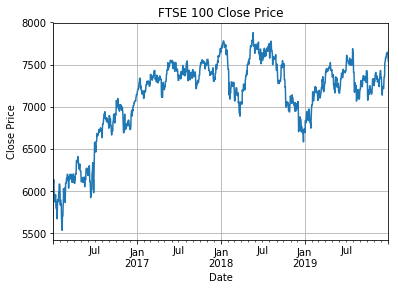

In [56]:
# Plot the closing prices for FTSE 100
ftseTime['Close'].plot(grid = True)

plt.ylabel('Close Price')
plt.title('FTSE 100 Close Price')
plt.show()

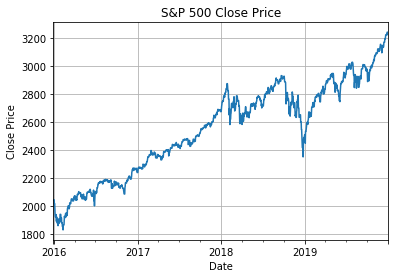

In [57]:
# Plot the closing prices for DJIA
SP500Time['Close'].plot(grid = True)

plt.ylabel('Close Price')
plt.title('S&P 500 Close Price')
plt.show()

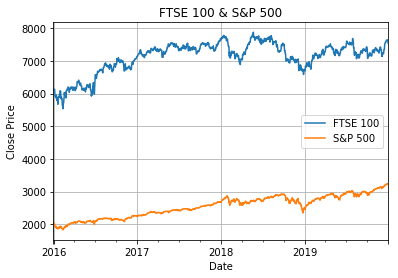

In [58]:
#Plot both FTSE 100 and S&P500 on the same graph
ftseTime['Close'].plot(grid = True, label = "FTSE 100")
SP500Time['Close'].plot(grid = True , label = "S&P 500")

plt.ylabel('Close Price')
plt.title('FTSE 100 & S&P 500')
plt.legend()
plt.show()

In [59]:
print("FTSE 100 reached an all-time high on", ftseNew.max())

FTSE 100 reached an all-time high on Date     2019-12-31 00:00:00
Close                7877.45
dtype: object


In [60]:
print("FTSE 100 reached an all-time low on",ftseNew.min())

FTSE 100 reached an all-time low on Date     2016-01-04 00:00:00
Close                5536.97
dtype: object


In [61]:
print("S&P 500 reached an all-time high on", SP500New.max())

S&P 500 reached an all-time high on Date     2019-12-31 00:00:00
Close                3240.02
dtype: object


In [62]:
print("S&P 500 reached an all-time low on", SP500New.min())

S&P 500 reached an all-time low on Date     2015-12-31 00:00:00
Close                1829.08
dtype: object


### FX Dataset

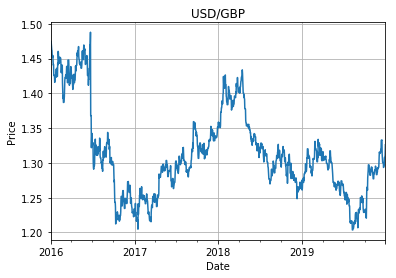

In [63]:
# Plot the closing prices for DJIA
FXUSDTime['Price'].plot(grid = True)

plt.ylabel('Price')
plt.title('USD/GBP')
plt.show()

In [64]:
print("USD/GBP exchange reached an all-time high on", FXUSDNew.max())

USD/GBP exchange reached an all-time high on Date     2019-12-31 00:00:00
Price                 1.4879
dtype: object


In [65]:
print("USD/GBP exchange reached an all-time low on", FXUSDNew.min())

USD/GBP exchange reached an all-time low on Date     2016-01-01 00:00:00
Price                 1.2037
dtype: object


## Feature Engineering

### News Dataset

Features to be applied to the news dataset:
- Number of words in a headline
- Number of characters in a headline
- Day when article is published
- Month when article is published
- Year when article is published
- Sentiment of headline: Positive/Negative/Neutral
- LDA topic analysis

In [66]:
newsarticlesdf2['PublishDate'] = [d.date() for d in newsarticlesdf2['PublicationDate']]
newsarticlesdf2['PublishTime'] = [d.time() for d in newsarticlesdf2['PublicationDate']]
newsarticlesdf2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12+00:00,2016-01-01,22:44:12
1,"Natalie Cole, singer and daughter of Nat King ...","<p><a href=""http://www.theguardian.com/culture...",4102,728,2017-11-29T04:58:24Z,The Guardian,2016-01-01T21:45:07Z,2016-01-01 21:45:07+00:00,2016-01-01,21:45:07
2,Carly Fiorina tweets support for alma mater's ...,<p>The Republican presidential candidate Carly...,1980,314,2017-07-14T20:17:16Z,theguardian.com,2016-01-01T21:40:36Z,2016-01-01 21:40:36+00:00,2016-01-01,21:40:36
3,Slowdown in Chinese manufacturing deepens fear...,<p>A further slowdown in China’s vast manufact...,4128,687,2017-11-29T04:58:43Z,The Guardian,2016-01-01T18:41:33Z,2016-01-01 18:41:33+00:00,2016-01-01,18:41:33
4,Some New Year resolutions for the Guardian,"<p>It’s inspiring to read in the <a href=""http...",5700,952,2017-11-29T04:58:51Z,The Guardian,2016-01-01T18:26:46Z,2016-01-01 18:26:46+00:00,2016-01-01,18:26:46


In [67]:
#Find day of week from the article
newsarticlesdf2['PublishDate'] = pd.to_datetime(newsarticlesdf2['PublishDate'],errors = 'coerce')
newsarticlesdf2['month'] = newsarticlesdf2['PublishDate'].dt.month
newsarticlesdf2['Month full'] = newsarticlesdf2['PublishDate'].dt.strftime('%B')
newsarticlesdf2['year'] = newsarticlesdf2['PublishDate'].dt.year
newsarticlesdf2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12+00:00,2016-01-01,22:44:12,1,January,2016
1,"Natalie Cole, singer and daughter of Nat King ...","<p><a href=""http://www.theguardian.com/culture...",4102,728,2017-11-29T04:58:24Z,The Guardian,2016-01-01T21:45:07Z,2016-01-01 21:45:07+00:00,2016-01-01,21:45:07,1,January,2016
2,Carly Fiorina tweets support for alma mater's ...,<p>The Republican presidential candidate Carly...,1980,314,2017-07-14T20:17:16Z,theguardian.com,2016-01-01T21:40:36Z,2016-01-01 21:40:36+00:00,2016-01-01,21:40:36,1,January,2016
3,Slowdown in Chinese manufacturing deepens fear...,<p>A further slowdown in China’s vast manufact...,4128,687,2017-11-29T04:58:43Z,The Guardian,2016-01-01T18:41:33Z,2016-01-01 18:41:33+00:00,2016-01-01,18:41:33,1,January,2016
4,Some New Year resolutions for the Guardian,"<p>It’s inspiring to read in the <a href=""http...",5700,952,2017-11-29T04:58:51Z,The Guardian,2016-01-01T18:26:46Z,2016-01-01 18:26:46+00:00,2016-01-01,18:26:46,1,January,2016


In [68]:
newsarticlesdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40320 entries, 0 to 40319
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   headline            40320 non-null  object             
 1   body                40320 non-null  object             
 2   charCount           40320 non-null  object             
 3   wordcount           40320 non-null  object             
 4   lastModified        40320 non-null  object             
 5   publication         40320 non-null  object             
 6   webPublicationDate  40320 non-null  object             
 7   PublicationDate     40320 non-null  datetime64[ns, UTC]
 8   PublishDate         40320 non-null  datetime64[ns]     
 9   PublishTime         40320 non-null  object             
 10  month               40320 non-null  int64              
 11  Month full          40320 non-null  object             
 12  year                40320 non-nu

Text(0.5,1,'Count of number of headlines published per year')

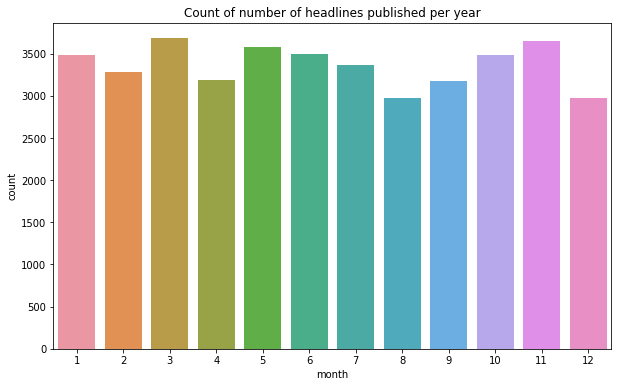

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf2['month'])
plt.title('Count of number of headlines published per year')

In [70]:
month = newsarticlesdf2['Month full']
year = newsarticlesdf2['year']

monthbyyear = newsarticlesdf2.groupby([month,year]).size()
monthbyyear = monthbyyear.rename_axis(['Month','Year']).unstack('Month').reindex(columns = order_month)
monthbyyear

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,1151,1144,1220,1091,1175,1205,1136,962,1049,1074,1141,894
2017,965,834,951,701,884,937,806,690,742,789,819,689
2018,652,617,736,710,728,648,696,642,639,724,771,596
2019,717,685,776,686,786,710,726,679,741,894,918,794


Text(0.5,1,'Heatmap - count of number of headlines published per month and year')

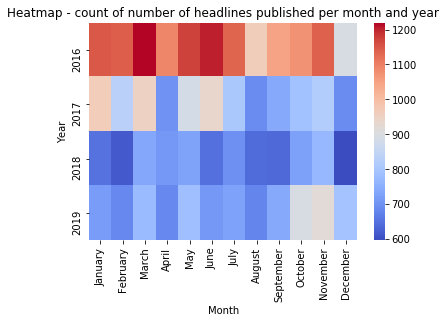

In [71]:
sns.heatmap(monthbyyear,cmap = 'coolwarm')
plt.title('Heatmap - count of number of headlines published per month and year')

<b><u>Comments</u></b>
<br>
There was a spike in the number of articles published in November, potentially due to the cororna pandemic which started taking pace during November.

In [72]:
#Sort the df by publish date and reset the index
newsarticlesdf2.sort_values(by = 'PublishDate',inplace = True)
newsarticlesdf2.reset_index(drop = True, inplace = True)
newsarticlesdf2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12+00:00,2016-01-01,22:44:12,1,January,2016
1,Novel about Jewish-Palestinian love affair is ...,<p>A novel about a love affair between a Jewis...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07+00:00,2016-01-01,01:04:07,1,January,2016
2,Former ABC managing director Brian Johns dies ...,<p>Former ABC managing director Brian Johns ha...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12+00:00,2016-01-01,01:22:12,1,January,2016
3,Hillary Clinton was told Angela Merkel is agai...,<p>Hillary Clinton was informed that German ch...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07+00:00,2016-01-01,04:36:07,1,January,2016
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46+00:00,2016-01-01,05:55:46,1,January,2016


In [73]:
newsarticlesdf2.describe()

,month,year
count,40320.000000,40320.000000
mean,6.428745,2017.325918
std,3.448247,1.152631
min,1.000000,2016.000000
25%,3.000000,2016.000000
50%,6.000000,2017.000000
75%,10.000000,2018.000000
max,12.000000,2019.000000


In [74]:
#WordCount and Character count from the Guardian API is for the body of the text.
#Create a new column for the character and word count of the headline
newsarticlesdf2['headline_text_count'] = newsarticlesdf2['headline'].apply(lambda x: len(str(x).split(" ")))
newsarticlesdf2['headline_char_count'] = newsarticlesdf2['headline'].str.len()
newsarticlesdf2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12+00:00,2016-01-01,22:44:12,1,January,2016,10,74
1,Novel about Jewish-Palestinian love affair is ...,<p>A novel about a love affair between a Jewis...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07+00:00,2016-01-01,01:04:07,1,January,2016,10,76
2,Former ABC managing director Brian Johns dies ...,<p>Former ABC managing director Brian Johns ha...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12+00:00,2016-01-01,01:22:12,1,January,2016,9,53
3,Hillary Clinton was told Angela Merkel is agai...,<p>Hillary Clinton was informed that German ch...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07+00:00,2016-01-01,04:36:07,1,January,2016,10,68
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46+00:00,2016-01-01,05:55:46,1,January,2016,13,72


In [75]:
newsarticlesdf2.describe()

,month,year,headline_text_count,headline_char_count
count,40320.000000,40320.000000,40320.000000,40320.000000
mean,6.428745,2017.325918,10.900446,67.019767
std,3.448247,1.152631,2.540568,13.328471
min,1.000000,2016.000000,2.000000,12.000000
25%,3.000000,2016.000000,9.000000,60.000000
50%,6.000000,2017.000000,11.000000,68.000000
75%,10.000000,2018.000000,12.000000,75.000000
max,12.000000,2019.000000,25.000000,140.000000


Text(0.5,1,'Count of number headlines per word count')

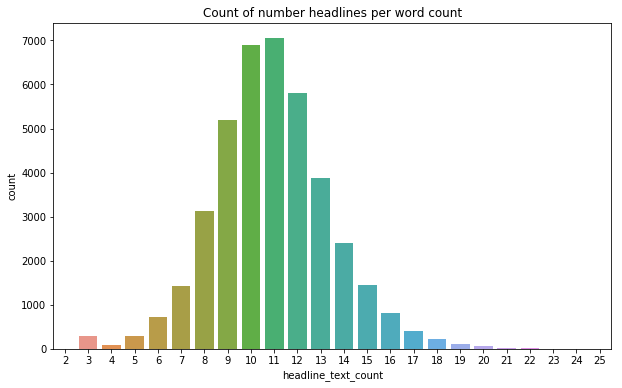

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf2['headline_text_count'])
plt.title('Count of number headlines per word count')

Text(0.5,1,'Count of number of characters in a headline')

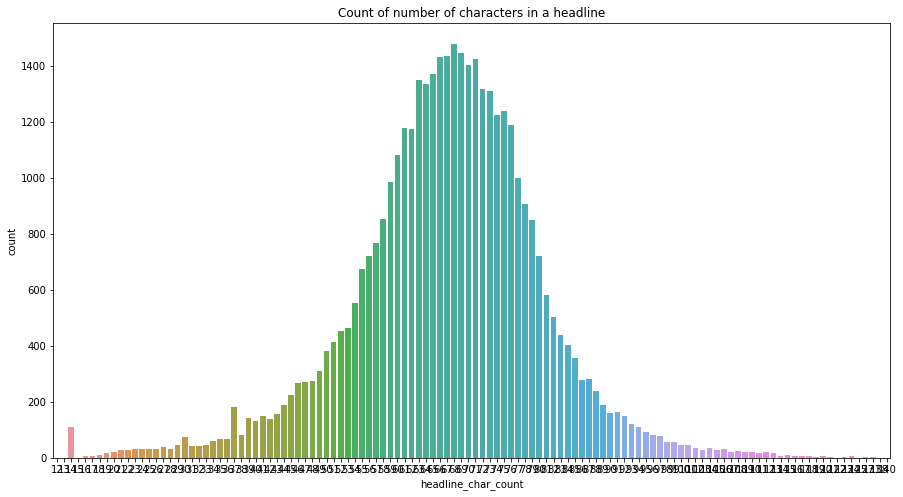

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(newsarticlesdf2['headline_char_count'])
plt.title('Count of number of characters in a headline')

<b><u>Comments</u></b>
<br>
Headlines generally have less words, to grab the readers attention. The average number of words in a headline is 6 words or less, which can be seen in the graphs above [23].

In [78]:
headlines_to_drop = ['Student News:','Newsdesk','in pictures','Picture desk','best photographs','world in pictures','photo highlights','Your photographs of',': 23032007','Student News','Daily Newsdesk','podcast:','StudentNews1:','News quiz:','Helen Boden:','Milling Around','52 weeks:','Underwater photography:','The Illustrated London News','Photo highlights','picture of the day','photo of the day','Eyewitness:','photographer of the year','Video:',' photographs of the day','video:','pictures of the day','Xan Brooks','Activate 2011:','Media Talk:','MediaTalk:','Mediatalk:','Media talk:','In pictures:','365 days:','366 days','The Guardian Essential Report','Mediatalk','MediaTalk','quiz:','tweets:','weekly:','Weekly:','quiz of']
newsarticlesdf3 = newsarticlesdf2[~newsarticlesdf2.headline.str.contains('|'.join(headlines_to_drop))]

In [79]:
newsarticlesdf3.shape

(40265, 15)

<b><u>Comments</u></b>
<br>
Remove the above words listed in headlines_to_drop as these headlines may not have an impact on the stock market. In order to precisely forecast the stock price using the news articles containing photos, image processing could be used to see what photos were released.

In [80]:
#Remove time zone from the datetime column - can't export file where timezones are present - not supported by excel.
newsarticlesdf3['PublicationDate']= newsarticlesdf3['PublicationDate'].dt.tz_localize(None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
newsarticlesdf3.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,Tamir Rice protesters picket house of Clevelan...,"<p>Anger over the decision <a href=""http://www...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,1,January,2016,10,74
1,Novel about Jewish-Palestinian love affair is ...,<p>A novel about a love affair between a Jewis...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,1,January,2016,10,76
2,Former ABC managing director Brian Johns dies ...,<p>Former ABC managing director Brian Johns ha...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,1,January,2016,9,53
3,Hillary Clinton was told Angela Merkel is agai...,<p>Hillary Clinton was informed that German ch...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,1,January,2016,10,68
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,1,January,2016,13,72


In [82]:
newsarticlesdf4 = newsarticlesdf3
newsarticlesdf4.shape

(40265, 15)

In [83]:
newsarticlesdf4['wordcount'].unique()

array(['627', '614', '412', ..., '2380', '1803', '11442'], dtype=object)

In [84]:
#newsarticlesdf4.to_excel('newsarticlesdf4.xlsx')

In [85]:
#newsarticlesdf4 = pd.read_excel('newsarticlesdf4.xlsx')

In [86]:
newsarticlesdf4.shape

(40265, 15)

In [87]:
newsarticlesdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40265 entries, 0 to 40319
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   headline             40265 non-null  object        
 1   body                 40265 non-null  object        
 2   charCount            40265 non-null  object        
 3   wordcount            40265 non-null  object        
 4   lastModified         40265 non-null  object        
 5   publication          40265 non-null  object        
 6   webPublicationDate   40265 non-null  object        
 7   PublicationDate      40265 non-null  datetime64[ns]
 8   PublishDate          40265 non-null  datetime64[ns]
 9   PublishTime          40265 non-null  object        
 10  month                40265 non-null  int64         
 11  Month full           40265 non-null  object        
 12  year                 40265 non-null  int64         
 13  headline_text_count  40265 non-

In [88]:
newsarticlesdf4['headline'] = newsarticlesdf4['headline'].astype('str')
newsarticlesdf4['body']=newsarticlesdf4['body'].astype('str')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from PIL import Image
from os import path

#### Clean text in body 

In [91]:
#code adapted from Data Science Blog [24]
#remove <br> </br> <p> </p> <b> </b> - html tags which were present in the body
newsarticlesdf4 = newsarticlesdf4.replace('<br>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</br>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('<b>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</b>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('<p>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</p>', '',regex = True)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,1,January,2016,10,74
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,1,January,2016,10,76
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,1,January,2016,9,53
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,1,January,2016,10,68
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,1,January,2016,13,72


In [92]:
#Use newsarticlesdf4 which contains headlines and body text
#convert text to lowercase
newsarticlesdf4['headline_clean'] = newsarticlesdf4['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
newsarticlesdf4['body_clean'] = newsarticlesdf4['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,1,January,2016,10,74,tamir rice protesters picket house of clevelan...,"anger over the decision <a href=""http://www.th..."
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,1,January,2016,10,76,novel about jewish-palestinian love affair is ...,a novel about a love affair between a jewish w...
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,1,January,2016,9,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,1,January,2016,10,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,1,January,2016,13,72,munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class..."


In [93]:
#remove special characters from the text
newsarticlesdf4['headline_clean'] = newsarticlesdf4['headline_clean'].str.replace('[^\w\s]','')
newsarticlesdf4['body_clean'] = newsarticlesdf4['body_clean'].str.replace('[^\w\s]','')
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,1,January,2016,10,74,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,1,January,2016,10,76,novel about jewishpalestinian love affair is b...,a novel about a love affair between a jewish w...
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,1,January,2016,9,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,1,January,2016,10,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,1,January,2016,13,72,munich police warned of attack by five to seve...,div idblock568611b9e4b0073bf25b8dfe classblock...


In [94]:
#Stopwords - remove stop words
stop = stopwords.words('english') #includes words such as I,my,we
#Extend the stop words to remove the below. These words will appear a lot in the headlines, which means 
#we would not be able to see the more important words in the headlines
stop.extend(['news','new','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','media','photo','photography','bn'])
newsarticlesdf4['headline_clean_stop'] = newsarticlesdf4['headline_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
newsarticlesdf4['body_clean_stop'] = newsarticlesdf4['body_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,1,January,2016,10,74,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,1,January,2016,10,76,novel about jewishpalestinian love affair is b...,a novel about a love affair between a jewish w...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,1,January,2016,9,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,1,January,2016,10,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,1,January,2016,13,72,munich police warned of attack by five to seve...,div idblock568611b9e4b0073bf25b8dfe classblock...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...


In [95]:
#Create word cloud
text = " ".join(headlines for headlines in newsarticlesdf4.headline)
print ("There are {} words in the combination of all headlines.".format(len(text)))

There are 2739517 words in the combination of all headlines.


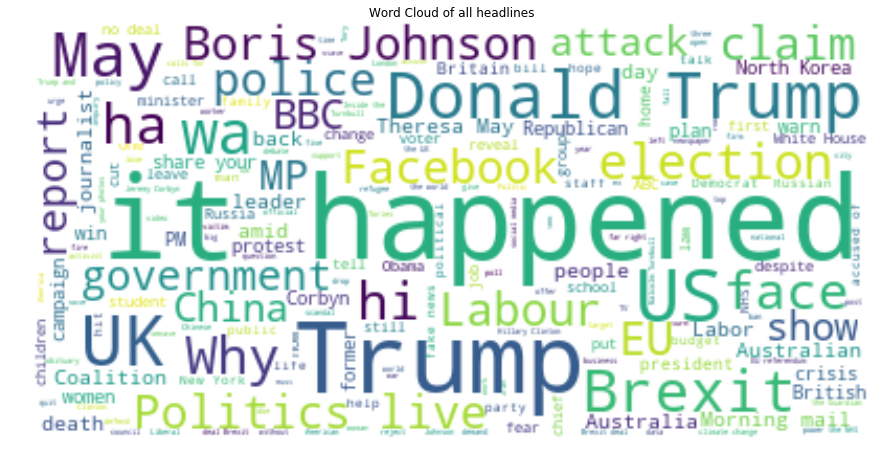

In [96]:
stopwords = ['BBC','say','new','News','media','Today','will','ad','says','news','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','media','photo','photography','bn'] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of all headlines')
plt.show()

The time series plots of the FTSE 100 show four distinct periods, hence investigate the words presents for these periods:
- 2016
- 2017
- 2018
- 2019

In [97]:
news2016 = newsarticlesdf4.loc[(newsarticlesdf4['year']>= 2016) &(newsarticlesdf4['year']< 2017)]
news2017 = newsarticlesdf4.loc[(newsarticlesdf4['year']>= 2017) &(newsarticlesdf4['year']< 2018)]
news2018 = newsarticlesdf4.loc[(newsarticlesdf4['year']>= 2018) &(newsarticlesdf4['year']< 2019)]
news2019 = newsarticlesdf4.loc[(newsarticlesdf4['year']>= 2019) &(newsarticlesdf4['year']< 2020)]

In [98]:
#Create word cloud
text2016 = " ".join(headlines for headlines in news2016.headline)
print ("There are {} words in the combination of all headlines in 2016".format(len(text2016)))

There are 886045 words in the combination of all headlines in 2016


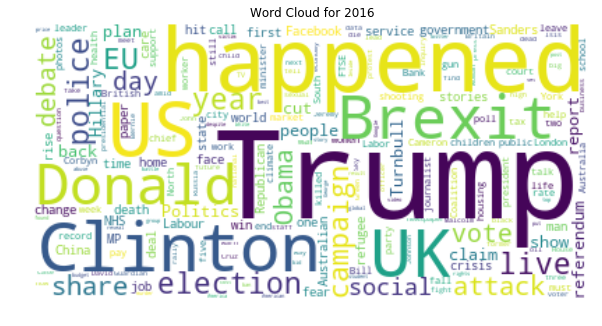

In [99]:
wordcloud2016 = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text2016)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud2016, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for 2016')
plt.show()

In [100]:
#Create word cloud
text2017 = " ".join(headlines for headlines in news2017.headline)
print ("There are {} words in the combination of all headlines in 2017.".format(len(text2017)))

There are 668889 words in the combination of all headlines in 2017.


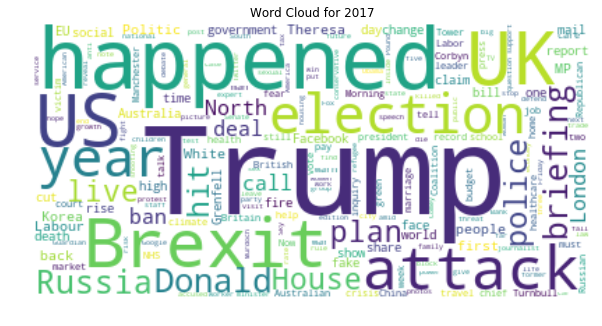

In [101]:
wordcloud2017 = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text2017)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud2017, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for 2017')
plt.show()

In [102]:
#Create word cloud
text2018 = " ".join(headlines for headlines in news2018.headline)
print ("There are {} words in the combination of all headlines in 2018.".format(len(text2018)))

There are 553906 words in the combination of all headlines in 2018.


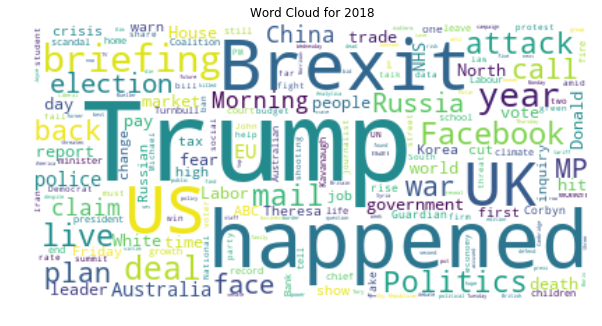

In [103]:
wordcloud2018 = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text2018)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud2018, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for 2018')
plt.show()

In [104]:
#Create word cloud
text2019 = " ".join(headlines for headlines in news2019.headline)
print ("There are {} words in the combination of all headlines in 2019.".format(len(text2019)))

There are 630674 words in the combination of all headlines in 2019.


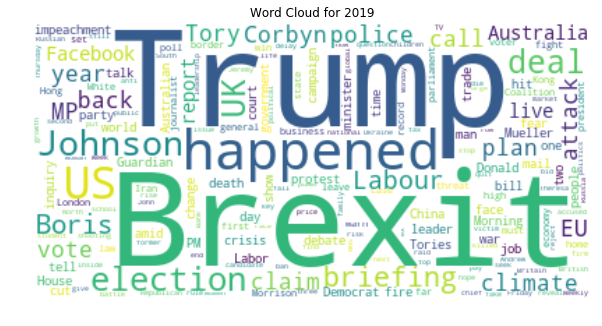

In [105]:
wordcloud2019 = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text2019)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud2019, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for 2019')
plt.show()

<b><u>Comments</u></b>

There are four distinct periods when looking at the stock indices graphs 

- 2016 - Clinton
- 2017 - Trump
- 2018 - Trump
- 2019 - Brexit 

#### Text Blob

In [106]:

def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
newsarticlesdf4['polarity_headline'] = newsarticlesdf4.headline_clean_stop.apply(detect_polarity)
newsarticlesdf4['polarity_body'] = newsarticlesdf4.body_clean_stop.apply(detect_polarity)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,January,2016,10,74,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,January,2016,10,76,novel about jewishpalestinian love affair is b...,a novel about a love affair between a jewish w...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...,0.500000,0.115833
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,January,2016,9,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...,-0.050000,0.119396
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,January,2016,10,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...,0.000000,0.029613
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,January,2016,13,72,munich police warned of attack by five to seve...,div idblock568611b9e4b0073bf25b8dfe classblock...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593


In [107]:
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
newsarticlesdf4['subjectivity_headline'] = newsarticlesdf4.headline_clean_stop.apply(detect_subjectivity)
newsarticlesdf4['subjectivity_body'] = newsarticlesdf4.body_clean_stop.apply(detect_subjectivity)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,10,74,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356,0.0,0.598280
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,10,76,novel about jewishpalestinian love affair is b...,a novel about a love affair between a jewish w...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...,0.500000,0.115833,0.6,0.365417
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,9,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...,-0.050000,0.119396,0.2,0.368978
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,10,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...,0.000000,0.029613,0.0,0.396207
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,13,72,munich police warned of attack by five to seve...,div idblock568611b9e4b0073bf25b8dfe classblock...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593,0.5,0.462881


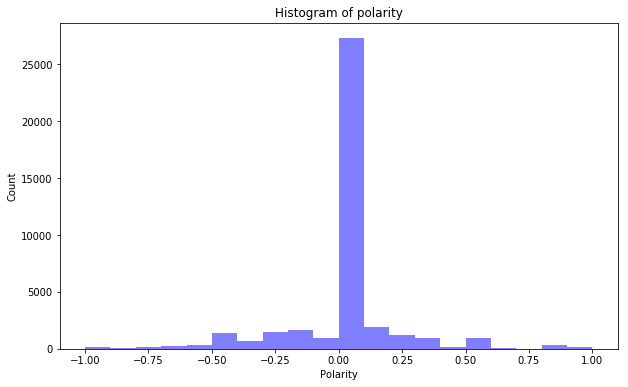

In [108]:
#Distribution of Polarity
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.polarity_headline, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

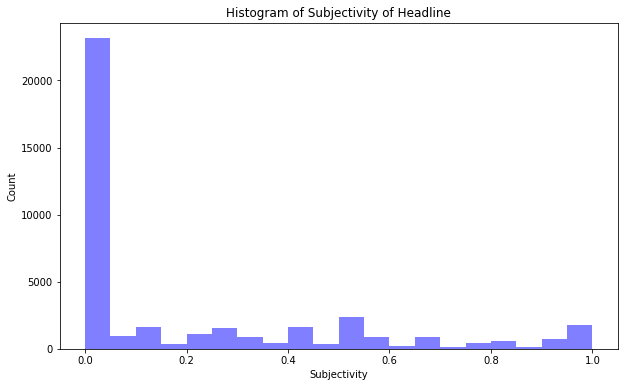

In [109]:
#Distribution of subjectivity headline
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.subjectivity_headline, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity of Headline')
plt.show();

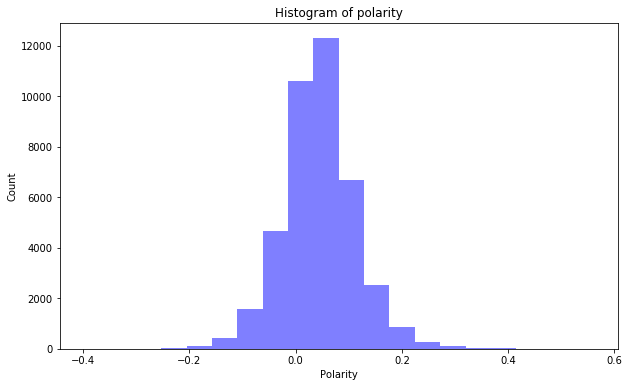

In [110]:
#Distribution of Polarity
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.polarity_body, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

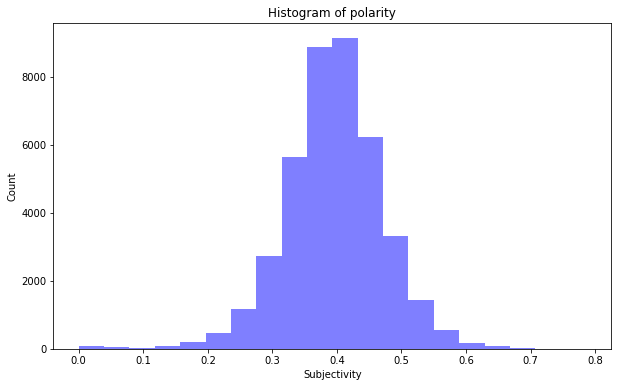

In [111]:
#Distribution of subjectivity of body 
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.subjectivity_body, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

<b><u>Comments</u></b>
<br>
TextBlob does not show any meaningful results for the sentiment of the headline. A number of articles have been classified as neutral when they should not be. VADER will be used instead to calculate the sentiment of the headline. TextBlob show some results for the sentiment of the body of the article, however due to computational resources, the body of the article is not in the scope of this investigation.

#### VADER

In [112]:
#Import vader package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [113]:
#apply vader sentiment to output columns neg,pos,neu and compound. Code adapted from [27]
sentiment = newsarticlesdf4['headline'].apply(lambda x: analyzer.polarity_scores(x))
newsarticlesdf4 = pd.concat([newsarticlesdf4,sentiment.apply(pd.Series)],1)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,neg,neu,pos,compound
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356,0.0,0.598280,0.174,0.826,0.000,-0.2263
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...,0.500000,0.115833,0.6,0.365417,0.000,0.552,0.448,0.7579
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...,-0.050000,0.119396,0.2,0.368978,0.000,1.000,0.000,0.0000
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...,0.000000,0.029613,0.0,0.396207,0.000,1.000,0.000,0.0000
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593,0.5,0.462881,0.492,0.508,0.000,-0.8658


In [114]:
#Drop neg neu and pos column from the dataset, only interested in the Compound sentiment analysis score
newsarticlesdf4 = newsarticlesdf4.drop(['neg','neu','pos'],axis = 1)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,74,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356,0.0,0.598280,-0.2263
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,76,novel about jewishpalestinian love affair is b...,a novel about a love affair between a jewish w...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...,0.500000,0.115833,0.6,0.365417,0.7579
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,53,former abc managing director brian johns dies ...,former abc managing director brian johns has d...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...,-0.050000,0.119396,0.2,0.368978,0.0000
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,68,hillary clinton was told angela merkel is agai...,hillary clinton was informed that german chanc...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...,0.000000,0.029613,0.0,0.396207,0.0000
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,72,munich police warned of attack by five to seve...,div idblock568611b9e4b0073bf25b8dfe classblock...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593,0.5,0.462881,-0.8658


In [115]:
#Add column to distinguish if the sentiment is positive,negative or neutral

def sentiment_class(num):
    if num > 0:
        return 'Positive'
    elif num <0:
        return 'Negative'
    else:
        return 'Neutral'

newsarticlesdf4['VaderSentiment'] = newsarticlesdf4['compound'].apply(sentiment_class)

newsarticlesdf4.head(1)

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,tamir rice protesters picket house of clevelan...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.0,0.176356,0.0,0.59828,-0.2263,Negative


##### Q. Are the news headlines predominantly positive, negative or neutral?

Text(0.5,1,'Number of headlines per year split by VaderSentiment')

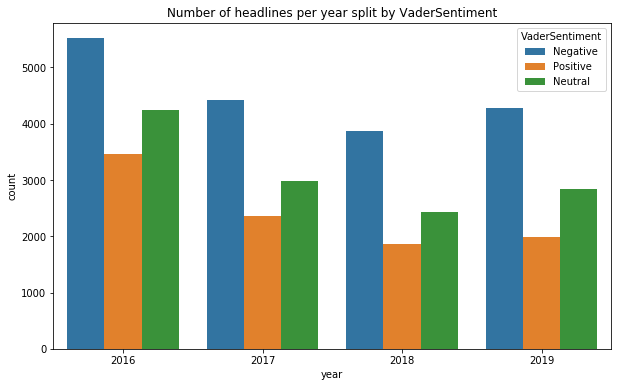

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf4['year'],hue = newsarticlesdf4['VaderSentiment'])
plt.title('Number of headlines per year split by VaderSentiment')

In [128]:
#Create a dataset from year 2016 onwards and negative sentiment 
news2016 = newsarticlesdf4.loc[(newsarticlesdf4['year']== 2016) &(newsarticlesdf4['VaderSentiment'] == 'Positive')]
news2016.shape

(3462, 25)

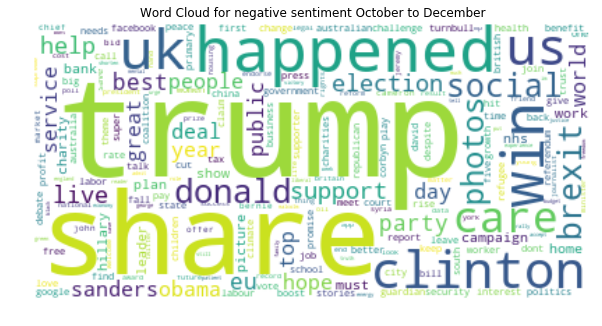

In [129]:
#Create word cloud
text2016 = " ".join(headlines for headlines in news2016.headline_clean_stop)

wordcloud2016 = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text2016)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud2016, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for negative sentiment October to December')
plt.show()

<b><u>Comments</u></b>
<br>
Digging deeper into the increase in negative sentiment headlines in 2016, the words associated with these headlines are 'fire' ,'attack' ,'labour','death'. There has been an increase in number of pandemics recently as well as Brexit causing uncertainty.

#### Topic Modelling and LDA 

##### Q. Can news headlines be classified into topics reliably?

In [132]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

[nltk_data] Downloading package wordnet to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
#stem words to the root of each word e.g. publishes becomes publish. Code adapted from StackOverFlor [29]

def stem_word(text):
    tokens = text.split()
    stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

newsarticlesdf4['headline_clean_stop_stem'] = newsarticlesdf4['headline_clean_stop'].apply(stem_word)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,anger over the decision a hrefhttpwwwtheguardi...,tamir rice protesters picket house cleveland p...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356,0.0,0.598280,-0.2263,Negative,tamir rice protest picket hous cleveland prose...
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,a novel about a love affair between a jewish w...,novel jewishpalestinian love affair barred isr...,novel love affair jewish woman palestinian man...,0.500000,0.115833,0.6,0.365417,0.7579,Positive,novel jewishpalestinian love affair bar isra c...
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,former abc managing director brian johns has d...,former abc managing director brian johns dies ...,former abc managing director brian johns died ...,-0.050000,0.119396,0.2,0.368978,0.0000,Neutral,former abc manag director brian john die age 79
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,hillary clinton was informed that german chanc...,hillary clinton told angela merkel obama pheno...,hillary clinton informed german chancellor ang...,0.000000,0.029613,0.0,0.396207,0.0000,Neutral,hillari clinton told angela merkel obama pheno...
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,div idblock568611b9e4b0073bf25b8dfe classblock...,munich police warned attack five seven suicide...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593,0.5,0.462881,-0.8658,Negative,munich polic warn attack five seven suicid bom...


In [134]:
#Column headline_clean_stop excludes stopwords and punctuation
#Create list of headline clean text

headline_text = newsarticlesdf4.headline_clean_stop_stem.values.tolist()
print(headline_text[:1])

['tamir rice protest picket hous cleveland prosecutor timothi mcginti']


In [135]:
#Code for LDA modelling has been adapted from DataSkunkWorks [30] and Machine Learning Plus [32]
#Tokenize words which is required by LDA 
def doc_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc = True))

headlinewords = list(doc_words(headline_text))

print(headlinewords[:1])

[['tamir', 'rice', 'protest', 'picket', 'hous', 'cleveland', 'prosecutor', 'timothi', 'mcginti']]


In [136]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(headlinewords)
 
# Create Corpus
corpus = [id2word.doc2bow(text) for text in headlinewords]
 
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           per_word_topics=True)



In [137]:
# Compute Perplexity score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=headlinewords, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.587750507777455

Coherence Score:  0.32672386948844057


In [138]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"brexit" + 0.023*"happen" + 0.015*"johnson" + 0.014*"say" + '
  '0.013*"trump" + 0.013*"labour" + 0.011*"brief" + 0.011*"impeach" + '
  '0.011*"uk" + 0.010*"bori"'),
 (1,
  '0.010*"polic" + 0.008*"trump" + 0.006*"attack" + 0.006*"fire" + '
  '0.006*"court" + 0.006*"die" + 0.005*"man" + 0.005*"death" + 0.005*"offic" + '
  '0.005*"murder"'),
 (2,
  '0.011*"us" + 0.008*"say" + 0.006*"stori" + 0.005*"australia" + '
  '0.005*"guardian" + 0.005*"blaze" + 0.005*"crisi" + 0.005*"climat" + '
  '0.005*"trump" + 0.004*"paper"'),
 (3,
  '0.023*"trump" + 0.018*"happen" + 0.011*"elect" + 0.011*"us" + '
  '0.009*"bushfir" + 0.008*"year" + 0.007*"record" + 0.006*"mail" + 0.006*"uk" '
  '+ 0.006*"climat"')]


In [139]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.136402 -0.099984       1        1  28.808245
1     -0.211632 -0.135141       2        1  24.455048
3      0.146561  0.008304       3        1  24.369171
2     -0.071331  0.226821       4        1  22.367537, topic_info=         Term         Freq        Total Category  logprob  loglift
1476   brexit  2922.000000  2922.000000  Default  30.0000  30.0000
206    happen  3323.000000  3323.000000  Default  29.0000  29.0000
280    labour  1190.000000  1190.000000  Default  28.0000  28.0000
5387  impeach   977.000000   977.000000  Default  27.0000  27.0000
3309  johnson  1583.000000  1583.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
368      home   220.296143   596.443115   Topic4  -5.7214   0.5015
49       year   248.510132  1208.555298   Topic4  -5.6008  -0.0841
259     trump   302.792206  3766.952393   Topic4  -5.4033  -1.0234
30     attack   218.063934   901.100220   Topic4  -5.7315   0.0787
79      elect   225.633179  1657.990601   Topic4  -5.6974  -0.4969

[286 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
626       4  0.987242  abandon
2632      1  0.994047   abbott
39        3  0.992734   access
354       1  0.193749    accus
354       2  0.493341    accus
...     ...       ...      ...
49        2  0.244921     year
49        3  0.460881     year
49        4  0.206031     year
4128      1  0.008256  zealand
4128      2  0.986600  zealand

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

<b><u>Comments</u></b>

From the visualisation above we see that even when setting the number of topics to 4. In addition, the coherence score of the model is quite low, indicating that this model may not be optimal. 
<br>
<b><u>Note</u></b>
<br>
As this is an unsupervised algorithm the topic classifcations change each time. 

In [140]:
# Find the optimal number of topics for LDA using gensim
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [141]:
#Find optimal number of topics - TAKES LONG TO RUN
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=headlinewords, start=2, limit=60, step=6)

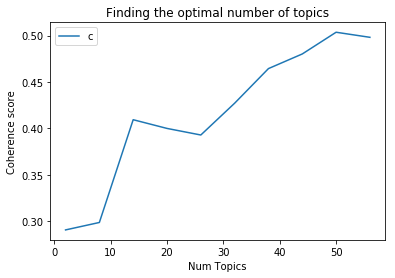

In [142]:
#Show graph
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Finding the optimal number of topics')
plt.show()

In [143]:
# Print the coherence scores
for y, cv in zip(x, coherence_values):
    print("Num Topics =", y, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2904
Num Topics = 8  has Coherence Value of 0.2984
Num Topics = 14  has Coherence Value of 0.4093
Num Topics = 20  has Coherence Value of 0.3999
Num Topics = 26  has Coherence Value of 0.3928
Num Topics = 32  has Coherence Value of 0.4271
Num Topics = 38  has Coherence Value of 0.4645
Num Topics = 44  has Coherence Value of 0.4802
Num Topics = 50  has Coherence Value of 0.5037
Num Topics = 56  has Coherence Value of 0.4982


<b><u>Comments</u></b>
<br>
Coherence allows us to judge how good the topic model is. From the graph above, the coherence score is at its highest at 50 topics. We will change the LDA topic number to 50 below and visualize them.

In [144]:
id2word = corpora.Dictionary(headlinewords)
 
#Create Corpus
corpus = [id2word.doc2bow(text) for text in headlinewords]
 
#Build LDA model
lda_model_optimise = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=50, 
                                          per_word_topics=True)

In [145]:
from pprint import pprint
pprint(lda_model_optimise.print_topics())
doc_lda_optimise = lda_model_optimise[corpus]

[(44,
  '0.105*"peopl" + 0.090*"talk" + 0.066*"use" + 0.056*"countri" + '
  '0.055*"across" + 0.054*"quit" + 0.044*"point" + 0.029*"feel" + '
  '0.026*"german" + 0.026*"radio"'),
 (23,
  '0.072*"public" + 0.058*"work" + 0.050*"left" + 0.049*"best" + '
  '0.045*"social" + 0.042*"scientist" + 0.041*"worker" + 0.039*"demand" + '
  '0.034*"word" + 0.034*"what"'),
 (22,
  '0.148*"climat" + 0.123*"chang" + 0.058*"question" + 0.054*"major" + '
  '0.050*"senat" + 0.049*"andrew" + 0.036*"look" + 0.026*"control" + '
  '0.025*"gun" + 0.022*"financi"'),
 (27,
  '0.072*"risk" + 0.070*"london" + 0.057*"way" + 0.046*"dont" + 0.045*"near" + '
  '0.039*"investig" + 0.036*"lead" + 0.034*"conserv" + 0.033*"shoot" + '
  '0.031*"find"'),
 (3,
  '0.180*"leader" + 0.108*"threat" + 0.046*"link" + 0.042*"rightw" + '
  '0.036*"address" + 0.032*"femal" + 0.031*"heart" + 0.027*"littl" + '
  '0.027*"lord" + 0.026*"indigen"'),
 (41,
  '0.045*"cost" + 0.043*"drug" + 0.041*"mean" + 0.040*"breach" + 0.039*"water" '
  

In [146]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_optimise, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
45     0.112885  0.255784       1        1  3.821405
29     0.238172 -0.119931       2        1  3.400709
17     0.151348 -0.008316       3        1  2.879151
36     0.261370 -0.051152       4        1  2.609435
10     0.004056  0.055269       5        1  2.573095
39    -0.028336  0.029286       6        1  2.473459
18    -0.070149 -0.014545       7        1  2.439234
32     0.153198 -0.135347       8        1  2.327955
1     -0.121380  0.001164       9        1  2.305445
8      0.094368  0.148768      10        1  2.215829
34     0.113162 -0.090858      11        1  2.186022
13    -0.020950 -0.076488      12        1  2.176407
43    -0.042698  0.171274      13        1  2.164284
33     0.033595 -0.035363      14        1  2.117037
15    -0.007934 -0.115745      15        1  2.113686
28     0.127757  0.057333      16        1  2.040804
9     -0.084836 -0.083600      17        1  2.028003
37     0.085953 -0.050665      18        1  2.019578
25    -0.042968 -0.108306      19        1  2.011235
31    -0.039351 -0.045868      20        1  2.002816
20     0.056732  0.025798      21        1  1.988312
27    -0.096537 -0.000453      22        1  1.981558
7     -0.009786 -0.000357      23        1  1.978019
21    -0.091288 -0.008586      24        1  1.968995
26     0.103889 -0.039548      25        1  1.952494
2      0.012052  0.171695      26        1  1.933694
48    -0.005494  0.021106      27        1  1.896618
22     0.060754 -0.003430      28        1  1.895875
4     -0.042039 -0.006579      29        1  1.883482
11    -0.010849 -0.034858      30        1  1.851015
23    -0.094239 -0.037472      31        1  1.843101
5     -0.001833 -0.049406      32        1  1.826690
47    -0.007306  0.009978      33        1  1.806108
14    -0.008087  0.007789      34        1  1.785574
46    -0.040571 -0.089926      35        1  1.771349
0      0.066766  0.097926      36        1  1.728465
12    -0.052529  0.024338      37        1  1.706095
44    -0.036928  0.029430      38        1  1.683137
42    -0.069758 -0.044146      39        1  1.648269
38    -0.097995  0.015901      40        1  1.643942
49    -0.042723 -0.039127      41        1  1.632524
16    -0.019090  0.057958      42        1  1.614103
40    -0.077484  0.072801      43        1  1.581394
35    -0.106958  0.014575      44        1  1.579809
41    -0.076697 -0.040530      45        1  1.570348
6     -0.070395 -0.034324      46        1  1.559149
24    -0.064670 -0.081034      47        1  1.555213
19     0.065061  0.115362      48        1  1.509390
3     -0.092913  0.016061      49        1  1.382363
30    -0.066346  0.046365      50        1  1.337324, topic_info=           Term         Freq        Total Category  logprob  loglift
259       trump  4942.000000  4942.000000  Default  30.0000  30.0000
1476     brexit  3331.000000  3331.000000  Default  29.0000  29.0000
3309    johnson  1628.000000  1628.000000  Default  28.0000  28.0000
84           us  2155.000000  2155.000000  Default  27.0000  27.0000
280      labour  1337.000000  1337.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2808    librari    24.486225    25.666342  Topic50  -5.1013   4.2674
3299    offshor    22.805727    23.967255  Topic50  -5.1724   4.2648
1305      teach    26.807060    28.250095  Topic50  -5.0108   4.2621
758      weekli   174.723053   260.649567  Topic50  -3.1362   3.9145
418   australia    33.343075  1061.616455  Topic50  -4.7926   0.8538

[1830 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
626      36  0.985179     abandon
2632      2  0.986889      abbott
15        6  0.991488         abc
15       31  0.003966         abc
2805     33  0.970804         abl
...     ...       ...         ...
1465     25  0.967424       youth
1119     35  0.972518      yo

<b><u>Comments</u></b>
<br>
50 topics shows the highest coherent score which shows the model is optimal. However, when applying 50 topics nearly all topics overlap. Looking at the four topics generated we can't easily give them a label, hence we can't generate topics reliably. Classifying topics for different years may yield better results.

In [147]:
model_list = lda_model.print_topics()
model_list

[(0,
  '0.032*"brexit" + 0.023*"happen" + 0.015*"johnson" + 0.014*"say" + 0.013*"trump" + 0.013*"labour" + 0.011*"brief" + 0.011*"impeach" + 0.011*"uk" + 0.010*"bori"'),
 (1,
  '0.010*"polic" + 0.008*"trump" + 0.006*"attack" + 0.006*"fire" + 0.006*"court" + 0.006*"die" + 0.005*"man" + 0.005*"death" + 0.005*"offic" + 0.005*"murder"'),
 (2,
  '0.011*"us" + 0.008*"say" + 0.006*"stori" + 0.005*"australia" + 0.005*"guardian" + 0.005*"blaze" + 0.005*"crisi" + 0.005*"climat" + 0.005*"trump" + 0.004*"paper"'),
 (3,
  '0.023*"trump" + 0.018*"happen" + 0.011*"elect" + 0.011*"us" + 0.009*"bushfir" + 0.008*"year" + 0.007*"record" + 0.006*"mail" + 0.006*"uk" + 0.006*"climat"')]

In [148]:
lda_model.show_topic(1)

[('polic', 0.009887165),
 ('trump', 0.008081143),
 ('attack', 0.0064942758),
 ('fire', 0.0059241825),
 ('court', 0.0059180576),
 ('die', 0.0058108736),
 ('man', 0.0054070735),
 ('death', 0.0053335214),
 ('offic', 0.0045604785),
 ('murder', 0.004531983)]

In [149]:
lda_model[corpus]

In [150]:
lda_model[corpus[1]]

([(0, 0.03625277), (1, 0.8900083), (2, 0.03781183), (3, 0.03592713)],
 [(9, [1]), (10, [1]), (11, [1]), (12, [1, 2]), (13, [1]), (14, [1])],
 [(9, [(1, 0.9998547)]),
  (10, [(1, 0.99982196)]),
  (11, [(1, 0.9857629)]),
  (12, [(1, 0.985373), (2, 0.011955815)]),
  (13, [(1, 0.99633026)]),
  (14, [(1, 0.99759984)])])

In [151]:
test_topics = lda_model.get_document_topics(corpus[0])
test_topics

[(0, 0.029377522), (1, 0.55166143), (2, 0.38869834), (3, 0.030262662)]

In [152]:
test_topics_max = max(test_topics, key=lambda x: x[1])
test_topics_max

(1, 0.55166143)

In [153]:
test_topics2 = pd.DataFrame(list(test_topics_max))

In [154]:
test_topics2 = test_topics2.transpose()


In [155]:
test_topics2.columns=['Topic','Percentage']
test_topics2

,Topic,Percentage
0,1.0,0.551661


In [156]:
#Get the topics and their percentage contribution for the headline
get_document_topics = [lda_model.get_document_topics(item) for item in corpus]

In [157]:
document_topics_df = pd.DataFrame(list(get_document_topics))
document_topics_df.head()

,0,1,2,3
0,"(0, 0.029378155)","(1, 0.5516524)","(2, 0.3886798)","(3, 0.030289726)"
1,"(0, 0.03625279)","(1, 0.88998854)","(2, 0.037831526)","(3, 0.03592715)"
2,"(0, 0.02829543)","(1, 0.91458917)","(2, 0.02866402)","(3, 0.028451368)"
3,"(0, 0.033161197)","(1, 0.034838077)","(2, 0.32615036)","(3, 0.60585034)"
4,"(0, 0.02829622)","(1, 0.22751729)","(2, 0.71855)","(3, 0.025636509)"


In [158]:
document_topics_df.shape

(40265, 4)

In [159]:
#Find the maximum percentage contribution for the row to identify the dominant topic
test_max = [max(p,key=lambda x: x[1]) for p in get_document_topics]
test_max

[(1, 0.5516524),
 (1, 0.88998854),
 (1, 0.91458917),
 (3, 0.60585034),
 (2, 0.71855),
 (3, 0.67101735),
 (0, 0.64200485),
 (2, 0.79911655),
 (2, 0.5072719),
 (3, 0.4994674),
 (1, 0.809836),
 (3, 0.5076817),
 (3, 0.9151102),
 (1, 0.8238311),
 (1, 0.8346884),
 (3, 0.5092951),
 (2, 0.9045886),
 (0, 0.66712403),
 (0, 0.90973127),
 (0, 0.69372475),
 (1, 0.5915839),
 (0, 0.792938),
 (2, 0.8481872),
 (1, 0.5718195),
 (1, 0.49284282),
 (2, 0.6590071),
 (0, 0.8810503),
 (2, 0.5407791),
 (0, 0.52730554),
 (3, 0.79571974),
 (3, 0.74294627),
 (3, 0.9146001),
 (1, 0.5462774),
 (3, 0.6878305),
 (3, 0.9007797),
 (0, 0.3612136),
 (1, 0.7958127),
 (1, 0.8832151),
 (2, 0.71147627),
 (1, 0.5716043),
 (2, 0.7854444),
 (3, 0.39514935),
 (3, 0.7999159),
 (0, 0.89609003),
 (3, 0.6249277),
 (0, 0.5880376),
 (2, 0.931278),
 (0, 0.5096767),
 (0, 0.5886794),
 (2, 0.5080548),
 (3, 0.46169546),
 (1, 0.4779363),
 (1, 0.4049411),
 (0, 0.91502875),
 (3, 0.7499557),
 (2, 0.5252499),
 (1, 0.59551597),
 (3, 0.81153727),

In [160]:
#Apply the above to a dataframe and rename the columns to topic and percentage contribution
doc_topics = pd.DataFrame(test_max)
doc_topics.columns = ['Topic','Percentage_Contribution']
doc_topics

,Topic,Percentage_Contribution
0,1,0.551652
1,1,0.889989
2,1,0.914589
3,3,0.605850
4,2,0.718550
...,...,...
40260,1,0.725970
40261,3,0.731999
40262,3,0.403882
40263,3,0.527347


In [161]:
#Join back to original df newsarticlesdf4

newsarticlesdf5 = newsarticlesdf4.merge(doc_topics,left_index = True, right_index = True)
newsarticlesdf5.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,anger decision hrefhttpwwwtheguardiancomusnews...,0.000000,0.176356,0.0,0.598280,-0.2263,Negative,tamir rice protest picket hous cleveland prose...,1,0.551652
1,Novel about Jewish-Palestinian love affair is ...,A novel about a love affair between a Jewish w...,3797,614,2017-09-20T10:16:37Z,theguardian.com,2016-01-01T01:04:07Z,2016-01-01 01:04:07,2016-01-01,01:04:07,...,novel love affair jewish woman palestinian man...,0.500000,0.115833,0.6,0.365417,0.7579,Positive,novel jewishpalestinian love affair bar isra c...,1,0.889989
2,Former ABC managing director Brian Johns dies ...,Former ABC managing director Brian Johns has d...,2475,412,2018-02-22T14:49:58Z,theguardian.com,2016-01-01T01:22:12Z,2016-01-01 01:22:12,2016-01-01,01:22:12,...,former abc managing director brian johns died ...,-0.050000,0.119396,0.2,0.368978,0.0000,Neutral,former abc manag director brian john die age 79,1,0.914589
3,Hillary Clinton was told Angela Merkel is agai...,Hillary Clinton was informed that German chanc...,6988,1191,2017-07-14T20:17:24Z,theguardian.com,2016-01-01T04:36:07Z,2016-01-01 04:36:07,2016-01-01,04:36:07,...,hillary clinton informed german chancellor ang...,0.000000,0.029613,0.0,0.396207,0.0000,Neutral,hillari clinton told angela merkel obama pheno...,3,0.605850
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,div idblock568611b9e4b0073bf25b8dfe classblock...,0.136364,0.148593,0.5,0.462881,-0.8658,Negative,munich polic warn attack five seven suicid bom...,2,0.718550


In [162]:
#Output the words associated with each topic
x = lda_model.show_topics()

nwords = {}
for topic,word in x:
    nwords[topic] = re.sub('[^A-Za-z ]+','',word)

nwords

{0: 'brexit  happen  johnson  say  trump  labour  brief  impeach  uk  bori',
 1: 'polic  trump  attack  fire  court  die  man  death  offic  murder',
 2: 'us  say  stori  australia  guardian  blaze  crisi  climat  trump  paper',
 3: 'trump  happen  elect  us  bushfir  year  record  mail  uk  climat'}

In [163]:
#Apply above to a df to join to newsarticlesdf5
topic_words = pd.DataFrame(list(nwords.items()),columns=['Topic', 'Topic_Words'])
topic_words

,Topic,Topic_Words
0,0,brexit happen johnson say trump labour b...
1,1,polic trump attack fire court die man d...
2,2,us say stori australia guardian blaze cr...
3,3,trump happen elect us bushfir year recor...


In [164]:
#Join to newsarticlesdf5 to get topic words and sort by PublishDate

newsarticlesdf6 = pd.merge(newsarticlesdf5,topic_words,left_on = 'Topic', right_on = 'Topic')
newsarticlesdf6.sort_values(by=['PublishDate'], inplace=True)
newsarticlesdf6.reset_index(drop = True, inplace = True)
newsarticlesdf6.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution,Topic_Words
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,0.000000,0.176356,0.00,0.598280,-0.2263,Negative,tamir rice protest picket hous cleveland prose...,1,0.551652,polic trump attack fire court die man d...
1,"A year in Putin portraits, from mocking memes ...",It’s been a bumper year for President Vladimir...,4428,755,2018-08-18T15:00:05Z,theguardian.com,2016-01-01T09:30:28Z,2016-01-01 09:30:28,2016-01-01,09:30:28,...,0.000000,0.064583,0.00,0.501334,-0.4019,Negative,year putin portrait mock meme edibl effigi,3,0.499467,trump happen elect us bushfir year recor...
2,UK new year events go ahead amid heightened se...,Millions of Britons have taken part in officia...,5423,902,2017-09-20T23:30:31Z,theguardian.com,2016-01-01T00:11:22Z,2016-01-01 00:11:22,2016-01-01,00:11:22,...,0.000000,-0.014431,0.00,0.314299,0.3400,Positive,uk year event ahead amid heighten secur around...,3,0.915110,trump happen elect us bushfir year recor...
3,Carly Fiorina tweets support for alma mater's ...,The Republican presidential candidate Carly Fi...,1980,314,2017-07-14T20:17:16Z,theguardian.com,2016-01-01T21:40:36Z,2016-01-01 21:40:36,2016-01-01,21:40:36,...,0.600000,0.012222,0.95,0.473333,0.4019,Positive,carli fiorina tweet support alma mater rose bo...,3,0.509295,trump happen elect us bushfir year recor...
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,0.136364,0.148593,0.50,0.462881,-0.8658,Negative,munich polic warn attack five seven suicid bom...,2,0.718550,us say stori australia guardian blaze cr...


In [165]:
newsarticlesdf6.shape

(40210, 29)

In [166]:
#Run Vader on topic words

topic_sentiment = newsarticlesdf6['Topic_Words'].apply(lambda x: analyzer.polarity_scores(x))
newsarticlesdf7 = pd.concat([newsarticlesdf6,topic_sentiment.apply(pd.Series)],1)
newsarticlesdf7.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution,Topic_Words,neg,neu,pos,compound
0,Tamir Rice protesters picket house of Clevelan...,"Anger over the decision <a href=""http://www.th...",3704,627,2017-07-14T20:17:15Z,theguardian.com,2016-01-01T22:44:12Z,2016-01-01 22:44:12,2016-01-01,22:44:12,...,-0.2263,Negative,tamir rice protest picket hous cleveland prose...,1,0.551652,polic trump attack fire court die man d...,0.783,0.217,0.0,-0.9584
1,"A year in Putin portraits, from mocking memes ...",It’s been a bumper year for President Vladimir...,4428,755,2018-08-18T15:00:05Z,theguardian.com,2016-01-01T09:30:28Z,2016-01-01 09:30:28,2016-01-01,09:30:28,...,-0.4019,Negative,year putin portrait mock meme edibl effigi,3,0.499467,trump happen elect us bushfir year recor...,0.000,1.000,0.0,0.0000
2,UK new year events go ahead amid heightened se...,Millions of Britons have taken part in officia...,5423,902,2017-09-20T23:30:31Z,theguardian.com,2016-01-01T00:11:22Z,2016-01-01 00:11:22,2016-01-01,00:11:22,...,0.3400,Positive,uk year event ahead amid heighten secur around...,3,0.915110,trump happen elect us bushfir year recor...,0.000,1.000,0.0,0.0000
3,Carly Fiorina tweets support for alma mater's ...,The Republican presidential candidate Carly Fi...,1980,314,2017-07-14T20:17:16Z,theguardian.com,2016-01-01T21:40:36Z,2016-01-01 21:40:36,2016-01-01,21:40:36,...,0.4019,Positive,carli fiorina tweet support alma mater rose bo...,3,0.509295,trump happen elect us bushfir year recor...,0.000,1.000,0.0,0.0000
4,Munich police warned of attack by 'five to sev...,"<div id=""block-568611b9e4b0073bf25b8dfe"" class...",13445,2361,2016-12-30T11:58:39Z,theguardian.com,2016-01-01T05:55:46Z,2016-01-01 05:55:46,2016-01-01,05:55:46,...,-0.8658,Negative,munich polic warn attack five seven suicid bom...,2,0.718550,us say stori australia guardian blaze cr...,0.000,1.000,0.0,0.0000


In [167]:
newsarticlesdf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40210 entries, 0 to 40209
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   headline                  40210 non-null  object        
 1   body                      40210 non-null  object        
 2   charCount                 40210 non-null  object        
 3   wordcount                 40210 non-null  object        
 4   lastModified              40210 non-null  object        
 5   publication               40210 non-null  object        
 6   webPublicationDate        40210 non-null  object        
 7   PublicationDate           40210 non-null  datetime64[ns]
 8   PublishDate               40210 non-null  datetime64[ns]
 9   PublishTime               40210 non-null  object        
 10  month                     40210 non-null  int64         
 11  Month full                40210 non-null  object        
 12  year              

In [168]:
newsarticlesdf8 = newsarticlesdf7[['PublishDate','compound']]
newsarticlesdf8.columns = ['PublishDate','HeadlineCompound','TopicCompound']
newsarticlesdf8.reset_index()
newsarticlesdf8.head(20)

,PublishDate,HeadlineCompound,TopicCompound
0,2016-01-01,-0.2263,-0.9584
1,2016-01-01,-0.4019,0.0000
2,2016-01-01,0.3400,0.0000
3,2016-01-01,0.4019,0.0000
4,2016-01-01,-0.8658,0.0000
5,2016-01-01,0.0000,0.0000
6,2016-01-01,-0.6249,0.0000
7,2016-01-01,0.0000,0.0000
8,2016-01-01,0.4767,0.0000
9,2016-01-01,0.7430,0.0000


In [169]:
newsarticlesdf9 = newsarticlesdf8.groupby('PublishDate').mean()
newsarticlesdf9.head()

,HeadlineCompound,TopicCompound
PublishDate,,
2016-01-01,-0.117233,-0.359400
2016-01-02,-0.146345,-0.087127
2016-01-03,-0.153812,-0.294892
2016-01-04,-0.215289,-0.085191
2016-01-05,-0.054081,-0.233124


### Stock market data

Features to be added to the stock market data
- Change exchange rate of S&P 500 index from USD to GBP
- EWMA - Exponential Weighted Moving Average
- Trading Strategy


In [170]:
#Join the ASX200 dataset and FXAud dataset in order to apply conversion to the S&P/ASX200 price to USD.

SP500Conversion  = pd.merge(SP500Time,FXUSDTime, on = 'Date')
SP500Conversion.columns = ['SP500_Close_USD','USD_Price','Chg%','Change %']
SP500Conversion['SP500_Close_GBP'] = SP500Conversion['SP500_Close_USD'] * SP500Conversion['USD_Price']
SP500Conversion.drop(labels = ['Chg%'], axis = 'columns', inplace = True)
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP
Date,,,,
2016-01-01,2043.939941,1.4748,0.06%,3014.402626
2016-01-02,2043.939941,1.4748,NaN,3014.402626
2016-01-03,2043.939941,1.4748,NaN,3014.402626
2016-01-04,2012.660034,1.4718,-0.20%,2962.233038
2016-01-05,2016.709961,1.4672,-0.31%,2958.916855


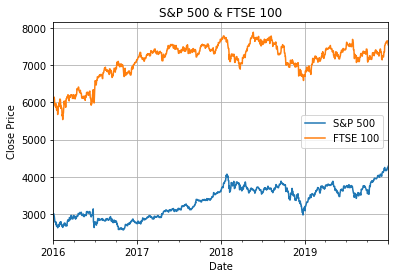

In [171]:
SP500Conversion['SP500_Close_GBP'].plot(grid = True, label = "S&P 500")
ftseTime['Close'].plot(grid = True , label = "FTSE 100")

plt.ylabel('Close Price')
plt.title('S&P 500 & FTSE 100')
plt.legend()
plt.show()

In [173]:
#Exponential Weighted Moving Average using 253 days, indicating an exponentially weight moving average over a year.
#The average number of trading days per calendar year is 253 days [33]
ftseTime['EWMA'] = ftseTime['Close'].ewm(span=253).mean()
ftseTime.head()

,Close,EWMA
Date,,
2016-01-04,6093.43,6093.430000
2016-01-05,6137.24,6115.421581
2016-01-06,6073.38,6101.296794
2016-01-07,5954.08,6064.055037
2016-01-08,5912.44,6033.250727


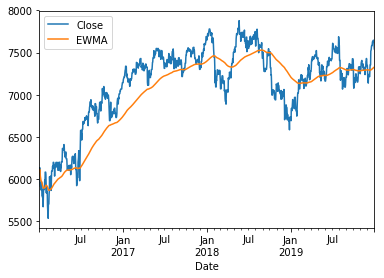

In [174]:
ftseTime[['Close','EWMA']].plot()

EWMA Strategy
- When the price crosses the EWMA curve from above - short (sell) the index - close price < EWMA
- When the price crosses the EWMA curve from below - long (buy) the index - close price > EWMA

In [175]:
ftseTime['Difference'] = ftseTime['Close'] - ftseTime['EWMA']
ftseTime.head()

,Close,EWMA,Difference
Date,,,
2016-01-04,6093.43,6093.430000,0.000000
2016-01-05,6137.24,6115.421581,21.818419
2016-01-06,6073.38,6101.296794,-27.916794
2016-01-07,5954.08,6064.055037,-109.975037
2016-01-08,5912.44,6033.250727,-120.810727


In [176]:
def trading_strat(num):
    if num > 0:
        return "Long"
    elif num <0:
        return "Short"
    else:
        return "Hold"

ftseTime['Trading_Strategy'] = ftseTime['Difference'].apply(trading_strat)
ftseTime.head()

,Close,EWMA,Difference,Trading_Strategy
Date,,,,
2016-01-04,6093.43,6093.430000,0.000000,Hold
2016-01-05,6137.24,6115.421581,21.818419,Long
2016-01-06,6073.38,6101.296794,-27.916794,Short
2016-01-07,5954.08,6064.055037,-109.975037,Short
2016-01-08,5912.44,6033.250727,-120.810727,Short


In [177]:
#Create new index for ftseTime df
ftseTime1 = ftseTime.reset_index()
ftseTime1.head()

,Date,Close,EWMA,Difference,Trading_Strategy
0,2016-01-04,6093.43,6093.430000,0.000000,Hold
1,2016-01-05,6137.24,6115.421581,21.818419,Long
2,2016-01-06,6073.38,6101.296794,-27.916794,Short
3,2016-01-07,5954.08,6064.055037,-109.975037,Short
4,2016-01-08,5912.44,6033.250727,-120.810727,Short


In [178]:
#Create new index for newsarticlesdf9 which contains sentiment analysis on headline and topic
newsarticlesdf10 = newsarticlesdf9.reset_index()
newsarticlesdf10.head()

,PublishDate,HeadlineCompound,TopicCompound
0,2016-01-01,-0.117233,-0.359400
1,2016-01-02,-0.146345,-0.087127
2,2016-01-03,-0.153812,-0.294892
3,2016-01-04,-0.215289,-0.085191
4,2016-01-05,-0.054081,-0.233124


In [179]:
ftseSentiment = pd.merge(ftseTime1,newsarticlesdf10,left_on = "Date", right_on = "PublishDate", how = "left")
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
0,2016-01-04,6093.43,6093.430000,0.000000,Hold,2016-01-04,-0.215289,-0.085191
1,2016-01-05,6137.24,6115.421581,21.818419,Long,2016-01-05,-0.054081,-0.233124
2,2016-01-06,6073.38,6101.296794,-27.916794,Short,2016-01-06,-0.181614,-0.156473
3,2016-01-07,5954.08,6064.055037,-109.975037,Short,2016-01-07,-0.146893,-0.287520
4,2016-01-08,5912.44,6033.250727,-120.810727,Short,2016-01-08,-0.184410,-0.239600


<b><u>Comments</u></b>
<br>
The initial strategy looks at the Exponential Weighted Moving Average over a calendar to year decide whether to buy, hold or sell the index. Incorporating the news headlines sentiment will be looked into now.

The logic for the new trading strategy will be:
- If the EWMA strategy states Long and both headline sentiment and topic sentiment are positive then buy the stock
- If the EWMA strategy states Short and both headline sentiment and topic sentiment are negative the sell the stock 
- If the EWMA strategy states hold and both headline sentiment and topic sentiment are neutral then hold the stock
- Otherwise hold the stock. 

In [180]:
def strategy(s):
    if (s['Trading_Strategy']  == "Long") & (s['HeadlineCompound'] > 0):
        return "Buy"
    elif (s['Trading_Strategy'] == "Short") & (s['HeadlineCompound'] <0):
        return "Sell"
    else:
        return "Hold"

ftseSentiment['Sentiment_Strategy'] = ftseSentiment.apply(strategy,axis = 1)
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
0,2016-01-04,6093.43,6093.430000,0.000000,Hold,2016-01-04,-0.215289,-0.085191,Hold
1,2016-01-05,6137.24,6115.421581,21.818419,Long,2016-01-05,-0.054081,-0.233124,Hold
2,2016-01-06,6073.38,6101.296794,-27.916794,Short,2016-01-06,-0.181614,-0.156473,Sell
3,2016-01-07,5954.08,6064.055037,-109.975037,Short,2016-01-07,-0.146893,-0.287520,Sell
4,2016-01-08,5912.44,6033.250727,-120.810727,Short,2016-01-08,-0.184410,-0.239600,Sell


In [181]:
ftseSentiment['Sentiment_Strategy'].unique()

array(['Hold', 'Sell', 'Buy'], dtype=object)

In [182]:
#Make Date the index for the dataframe
ftseSentiment1 = ftseSentiment.set_index('Date')
ftseSentiment1.head()

,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
Date,,,,,,,,
2016-01-04,6093.43,6093.430000,0.000000,Hold,2016-01-04,-0.215289,-0.085191,Hold
2016-01-05,6137.24,6115.421581,21.818419,Long,2016-01-05,-0.054081,-0.233124,Hold
2016-01-06,6073.38,6101.296794,-27.916794,Short,2016-01-06,-0.181614,-0.156473,Sell
2016-01-07,5954.08,6064.055037,-109.975037,Short,2016-01-07,-0.146893,-0.287520,Sell
2016-01-08,5912.44,6033.250727,-120.810727,Short,2016-01-08,-0.184410,-0.239600,Sell


In [183]:
#Normalize the close price and EWMA to plot headline sentiment values on same graph using standardscaler. 
ftseSentiment1[['Close','EWMA','HeadlineCompound',]] = StandardScaler().fit_transform(ftseSentiment[['Close','EWMA','HeadlineCompound']])
ftseSentiment1.head()

,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
Date,,,,,,,,
2016-01-04,-2.208036,-1.933211,0.000000,Hold,2016-01-04,-1.013582,-0.085191,Hold
2016-01-05,-2.114223,-1.887388,21.818419,Long,2016-01-05,0.765850,-0.233124,Hold
2016-01-06,-2.250970,-1.916819,-27.916794,Short,2016-01-06,-0.641877,-0.156473,Sell
2016-01-07,-2.506434,-1.994418,-109.975037,Short,2016-01-07,-0.258614,-0.287520,Sell
2016-01-08,-2.595600,-2.058604,-120.810727,Short,2016-01-08,-0.672733,-0.239600,Sell


Text(0.5,1,'FTSE 100 with 4 years EWMA and headline sentiment')

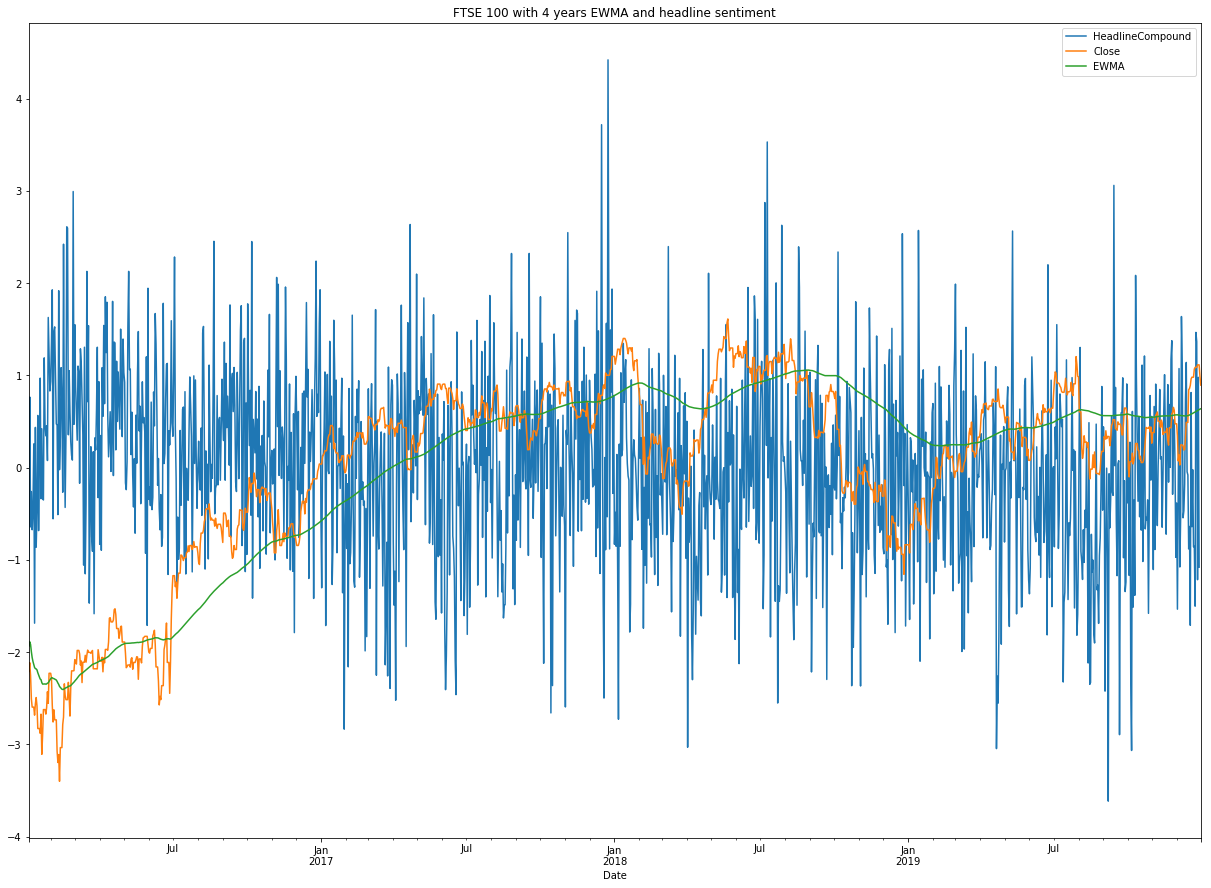

In [189]:
#Plot headlinecompound first to overlay the index values on top
ftseSentiment1[['HeadlineCompound','Close','EWMA']].plot(figsize = (21,15))
plt.title('FTSE 100 with 4 years EWMA and headline sentiment')

<b><u>Comments</u></b>
<br>
There is a lot of noise which can be seen above from the sentiment analysis on the news headlines. The lag of when news headlines are published and when this is incorporated in the price of the index can be seen. In mid 2018, a news headline had a high positive sentiment score and a few days later the stock price had increased. To improve on this, key words should be looked at to look at the impact on the stock market.

#### Q. The news articles have been publlished by The Guardian, but do these news articles have an effect on other Global indicies?

In [190]:
#Apply the EWMA with a period of 1 year similar to the FTSE 100 dataframe
SP500Conversion['EWMA'] = SP500Conversion['SP500_Close_USD'].ewm(span=253).mean()
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA
Date,,,,,
2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941
2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941
2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941
2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994
2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266


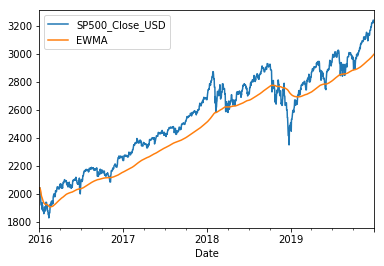

In [191]:
SP500Conversion[['SP500_Close_USD','EWMA']].plot()

In [192]:
SP500Conversion['Difference'] = SP500Conversion['SP500_Close_USD'] - SP500Conversion['EWMA']
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference
Date,,,,,,
2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941,0.000000
2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000
2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000
2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994,-23.366960
2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266,-15.392305


In [193]:
def trading_strat(num):
    if num > 0:
        return "Long"
    elif num <0:
        return "Short"
    else:
        return "Hold"

SP500Conversion['Trading_Strategy'] = SP500Conversion['Difference'].apply(trading_strat)
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy
Date,,,,,,,
2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941,0.000000,Hold
2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold
2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold
2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994,-23.366960,Short
2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266,-15.392305,Short


In [194]:
#Add sentiment scores to the stock data 
# steps - reset index for both ftse and news articles df 
#Join on date
#plot sentiment against the time series plot

#Create new index for ftseTime df
SP500Conversion1 = SP500Conversion.reset_index()
SP500Conversion1.head()

,Date,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy
0,2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941,0.000000,Hold
1,2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold
2,2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold
3,2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994,-23.366960,Short
4,2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266,-15.392305,Short


In [195]:
SP500Sentiment = pd.merge(SP500Conversion1,newsarticlesdf10,left_on = "Date", right_on = "PublishDate", how = "left")
SP500Sentiment.head()

,Date,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
0,2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941,0.000000,Hold,2016-01-01,-0.117233,-0.359400
1,2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold,2016-01-02,-0.146345,-0.087127
2,2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold,2016-01-03,-0.153812,-0.294892
3,2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994,-23.366960,Short,2016-01-04,-0.215289,-0.085191
4,2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266,-15.392305,Short,2016-01-05,-0.054081,-0.233124


In [196]:
#Make Date the index for the dataframe
SP500Sentiment1 = SP500Sentiment.set_index('Date')
SP500Sentiment1.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
Date,,,,,,,,,,
2016-01-01,2043.939941,1.4748,0.06%,3014.402626,2043.939941,0.000000,Hold,2016-01-01,-0.117233,-0.359400
2016-01-02,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold,2016-01-02,-0.146345,-0.087127
2016-01-03,2043.939941,1.4748,NaN,3014.402626,2043.939941,0.000000,Hold,2016-01-03,-0.153812,-0.294892
2016-01-04,2012.660034,1.4718,-0.20%,2962.233038,2036.026994,-23.366960,Short,2016-01-04,-0.215289,-0.085191
2016-01-05,2016.709961,1.4672,-0.31%,2958.916855,2032.102266,-15.392305,Short,2016-01-05,-0.054081,-0.233124


In [197]:
#Normalize the close price and EWMA to plot headline sentiment values on same graph using standardscaler. 
SP500Sentiment1[['SP500_Close_USD','EWMA','HeadlineCompound']] = StandardScaler().fit_transform(SP500Sentiment1[['SP500_Close_USD','EWMA','HeadlineCompound']])
SP500Sentiment1.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
Date,,,,,,,,,,
2016-01-01,-1.515489,1.4748,0.06%,3014.402626,-1.335382,0.000000,Hold,2016-01-01,0.069190,-0.359400
2016-01-02,-1.515489,1.4748,NaN,3014.402626,-1.335382,0.000000,Hold,2016-01-02,-0.252464,-0.087127
2016-01-03,-1.515489,1.4748,NaN,3014.402626,-1.335382,0.000000,Hold,2016-01-03,-0.334956,-0.294892
2016-01-04,-1.609226,1.4718,-0.20%,2962.233038,-1.360550,-23.366960,Short,2016-01-04,-1.014207,-0.085191
2016-01-05,-1.597090,1.4672,-0.31%,2958.916855,-1.373033,-15.392305,Short,2016-01-05,0.766947,-0.233124


Text(0.5,1,'S&P 500 with 4 years EWMA and headline sentiment')

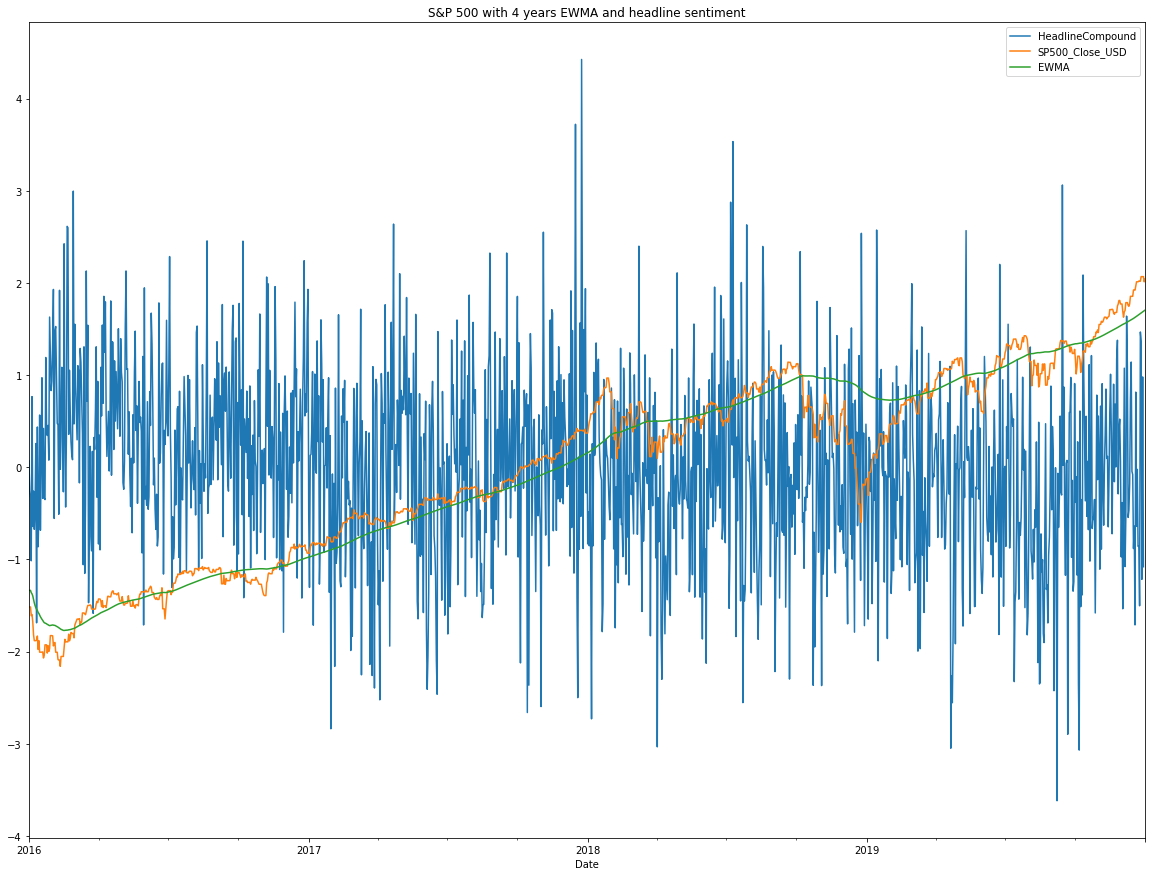

In [199]:
#Plot headlinecompound first to overlay the index values on top
SP500Sentiment1[['HeadlineCompound','SP500_Close_USD','EWMA']].plot(figsize = (20,15))
plt.title('S&P 500 with 4 years EWMA and headline sentiment')

<b><u>Comments</u></b>
<br>
There is a considerable amount of noise present in the news headline sentiment. However, there are some trends such as in 2018 the stock price hit a high point and there was a positive news sentiment.


#### Q. Is there any correlation between news headline sentiment and stock price?

Text(0.5,1,'Correlation Heatmap of FTSE 100 and Headline Sentiment')

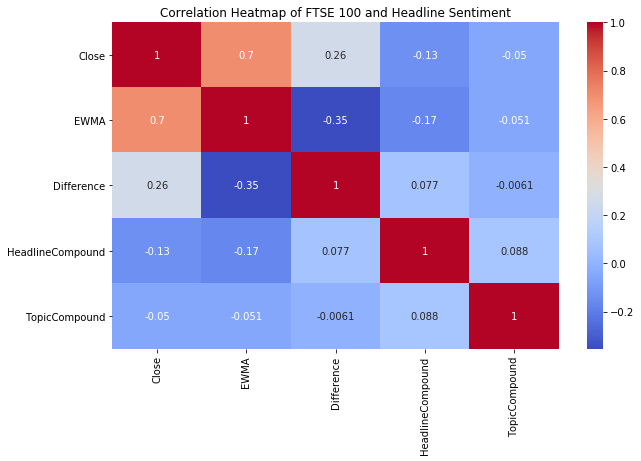

In [200]:
plt.subplots(figsize = (10,6))
graph1 = sns.heatmap(ftseSentiment.corr(method = 'spearman'),cmap = 'coolwarm',annot = True)
plt.title('Correlation Heatmap of FTSE 100 and Headline Sentiment')

Text(0.5,1,'Correlation Heatmap of S&P 500 and Headline Sentiment')

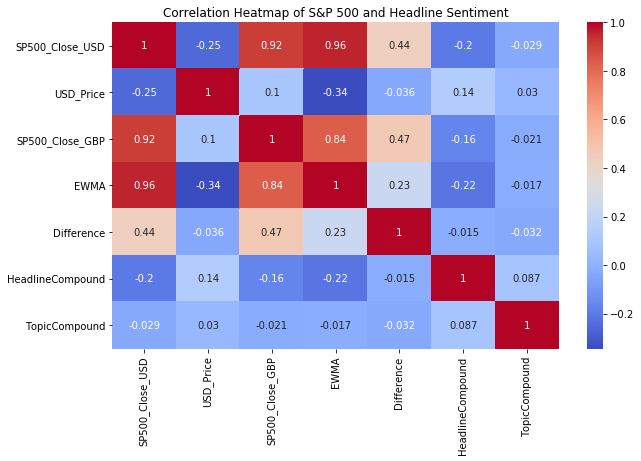

In [201]:
plt.subplots(figsize = (10,6))
graph1 = sns.heatmap(SP500Sentiment.corr(method = 'spearman'),cmap = 'coolwarm',annot = True)
plt.title('Correlation Heatmap of S&P 500 and Headline Sentiment')

<b><u>Comments</u></b>
<br>
Spearman correlation is used to measure the degree of association between two variables. There is a weak negative correlation between the headline sentiment and closing price of the stock index for both FTSE 100 and S&P500.


#### Q. Can news headline sentiment be used to predict the stock index values?

##### Multiple Linear Regression

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
0,2016-01-04,6093.43,6093.430000,0.000000,Hold,2016-01-04,-0.215289,-0.085191,Hold
1,2016-01-05,6137.24,6115.421581,21.818419,Long,2016-01-05,-0.054081,-0.233124,Hold
2,2016-01-06,6073.38,6101.296794,-27.916794,Short,2016-01-06,-0.181614,-0.156473,Sell
3,2016-01-07,5954.08,6064.055037,-109.975037,Short,2016-01-07,-0.146893,-0.287520,Sell
4,2016-01-08,5912.44,6033.250727,-120.810727,Short,2016-01-08,-0.184410,-0.239600,Sell


In [204]:
#Format date to ordinal to run through linear regression model as linear regression model does not accept date as datetime format
import datetime as dt
ftseSentiment['DateOrdinal'] = ftseSentiment['Date'].map(dt.datetime.toordinal)
ftseSentiment['PublishDateOrdinal'] = ftseSentiment['PublishDate'].map(dt.datetime.toordinal)
ftseSentiment.head()


,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy,DateOrdinal,PublishDateOrdinal
0,2016-01-04,6093.43,6093.430000,0.000000,Hold,2016-01-04,-0.215289,-0.085191,Hold,735967,735967
1,2016-01-05,6137.24,6115.421581,21.818419,Long,2016-01-05,-0.054081,-0.233124,Hold,735968,735968
2,2016-01-06,6073.38,6101.296794,-27.916794,Short,2016-01-06,-0.181614,-0.156473,Sell,735969,735969
3,2016-01-07,5954.08,6064.055037,-109.975037,Short,2016-01-07,-0.146893,-0.287520,Sell,735970,735970
4,2016-01-08,5912.44,6033.250727,-120.810727,Short,2016-01-08,-0.184410,-0.239600,Sell,735971,735971


In [205]:
X = ftseSentiment[['DateOrdinal','PublishDateOrdinal','HeadlineCompound']]
y = ftseSentiment['Close']

In [206]:
X.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound
0,735967,735967,-0.215289
1,735968,735968,-0.054081
2,735969,735969,-0.181614
3,735970,735970,-0.146893
4,735971,735971,-0.184410


In [207]:
y.head()

0    6093.43
1    6137.24
2    6073.38
3    5954.08
4    5912.44
Name: Close, dtype: float64

In [208]:
#Split the dataframe into training and test sets. Code for MLR adapted from StackAbuse.com[35]
#Enter a value for random state for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [209]:
#Create MLR
from sklearn.linear_model import LinearRegression
mlr_mod = LinearRegression()

In [210]:
X_train.fillna(X_train.mean(),inplace = True)
X_test.fillna(X_test.mean(),inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [211]:
#Fit the model
mlr_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
#make predictions on the test set
pred_price = mlr_mod.predict(X_test)

In [213]:
pred_price[1]

7241.817136594036

In [214]:
#compute RMSE and R2 statistics
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred_price)))
test_set_r2 = r2_score(y_test,pred_price)

In [215]:
print(test_set_rmse)

365.04806196143477


In [216]:
print(test_set_r2)

0.3047118989660077


In [217]:
prediction_values = pd.DataFrame({'Actual':y_test,'Predicted':pred_price})
prediction_values.head()

,Actual,Predicted
1320,7117.15,7595.329994
836,7328.92,7241.817137
413,7299.86,6891.650241
522,7527.33,6976.551665
1035,7094.12,7318.780345


In [218]:
X_test

,DateOrdinal,PublishDateOrdinal,HeadlineCompound
1320,737287,737287,-0.334366
836,736803,736803,-0.268987
413,736380,736380,-0.078209
522,736489,736489,-0.110082
1035,737002,737002,-0.074090
...,...,...,...
331,736298,736298,-0.068821
323,736290,736290,-0.135950
649,736616,736616,-0.364308
439,736406,736406,-0.157917


In [219]:
y_test

1320    7117.15
836     7328.92
413     7299.86
522     7527.33
1035    7094.12
         ...   
331     6783.79
323     6819.72
649     7535.44
439     7424.96
974     7457.86
Name: Close, Length: 438, dtype: float64

In [220]:
#Merge predicted values to the X_test by index
predicted_test_set = X_test.merge(prediction_values,left_index = True, right_index = True)
predicted_test_set.reset_index(drop = True, inplace = True)
predicted_test_set.head()


,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
0,737287,737287,-0.334366,7117.15,7595.329994
1,736803,736803,-0.268987,7328.92,7241.817137
2,736380,736380,-0.078209,7299.86,6891.650241
3,736489,736489,-0.110082,7527.33,6976.551665
4,737002,737002,-0.074090,7094.12,7318.780345


In [221]:
dt = datetime.fromordinal(736390)
dt

datetime.datetime(2017, 3, 2, 0, 0)

In [222]:
#Change Date column from ordinal to datetime to plot
predicted_test_set['NewDate'] = predicted_test_set['DateOrdinal'].map(date.fromordinal)
predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737287,737287,-0.334366,7117.15,7595.329994,2019-08-16
1,736803,736803,-0.268987,7328.92,7241.817137,2018-04-19
2,736380,736380,-0.078209,7299.86,6891.650241,2017-02-20
3,736489,736489,-0.110082,7527.33,6976.551665,2017-06-09
4,737002,737002,-0.074090,7094.12,7318.780345,2018-11-04


In [223]:
#Sort the df by publish date and reset the index
predicted_test_set.sort_values(by = 'NewDate',inplace = True)
predicted_test_set.reset_index(drop = True, inplace = True)
predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,735977,735977,-0.166687,5918.23,6641.367743,2016-01-14
1,735982,735982,-0.153994,5876.80,6640.897474,2016-01-19
2,735990,735990,-0.116440,5990.37,6634.827524,2016-01-27
3,735996,735996,0.051156,5922.01,6587.281438,2016-02-02
4,735997,735997,-0.173681,5837.14,6657.299255,2016-02-03


In [224]:
#Set NewDate as the index
predicted_test_set1 = predicted_test_set.set_index('NewDate')
predicted_test_set1.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
NewDate,,,,,
2016-01-14,735977,735977,-0.166687,5918.23,6641.367743
2016-01-19,735982,735982,-0.153994,5876.80,6640.897474
2016-01-27,735990,735990,-0.116440,5990.37,6634.827524
2016-02-02,735996,735996,0.051156,5922.01,6587.281438
2016-02-03,735997,735997,-0.173681,5837.14,6657.299255


Text(0.5,1,'Actual vs Predicted Closing Price values of FTSE 100 using Multiple Linear Regression')

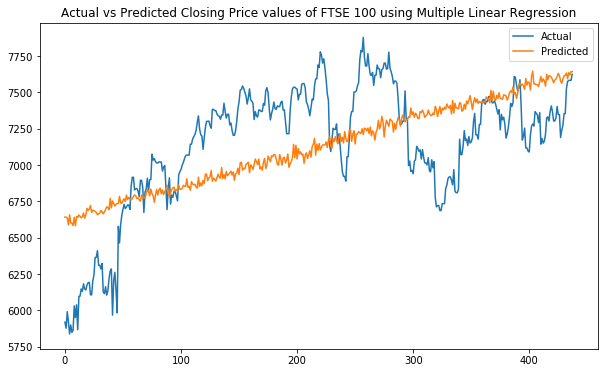

In [225]:
predicted_test_set[['Actual','Predicted']].plot(figsize = (10,6))
plt.title('Actual vs Predicted Closing Price values of FTSE 100 using Multiple Linear Regression')

<b><u>Comments</u></b>
<br>
Although the predicted values follow the same trend as the actual closing price values, the linear regression model does not capture the sudden drops of the price such as during the financial crisis. If the linear regression model was implemented to predict stock prices, heavy losses would have been suffered during the financial crisis.

#### Random Forest Regression

In [226]:
from sklearn.ensemble.forest import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [227]:
#Code for Random Forest adapted from PythonData.com [36]
RF_Model = RandomForestRegressor(n_estimators = 100, oob_score = True)

In [228]:
#Fit the model
randomforest = RF_Model.fit(X_train,y_train)

In [229]:
rf_test_pred = RF_Model.predict(X_test)

In [230]:
rf_test_pred[1]

7310.564900000005

In [231]:
rf_test_set_rmse = (np.sqrt(mean_squared_error(y_test,rf_test_pred)))
rf_test_set_r2 = r2_score(y_test,rf_test_pred)

In [232]:
print(rf_test_set_rmse)

42.32131936659726


In [233]:
print(rf_test_set_r2)

0.9906549183651873


In [234]:
rf_prediction_values = pd.DataFrame({'Actual':y_test,'Predicted':rf_test_pred})
rf_prediction_values.head()

,Actual,Predicted
1320,7117.15,7112.8711
836,7328.92,7310.5649
413,7299.86,7287.6011
522,7527.33,7488.0839
1035,7094.12,7087.4386


In [235]:
#Merge predicted values to the X_test by index
rf_predicted_test_set = X_test.merge(rf_prediction_values,left_index = True, right_index = True)
rf_predicted_test_set.reset_index(drop = True, inplace = True)
rf_predicted_test_set.head()



,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
0,737287,737287,-0.334366,7117.15,7112.8711
1,736803,736803,-0.268987,7328.92,7310.5649
2,736380,736380,-0.078209,7299.86,7287.6011
3,736489,736489,-0.110082,7527.33,7488.0839
4,737002,737002,-0.074090,7094.12,7087.4386


In [236]:
#Change Date column from ordinal to datetime to plot
rf_predicted_test_set['NewDate'] = rf_predicted_test_set['DateOrdinal'].map(date.fromordinal)
rf_predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737287,737287,-0.334366,7117.15,7112.8711,2019-08-16
1,736803,736803,-0.268987,7328.92,7310.5649,2018-04-19
2,736380,736380,-0.078209,7299.86,7287.6011,2017-02-20
3,736489,736489,-0.110082,7527.33,7488.0839,2017-06-09
4,737002,737002,-0.074090,7094.12,7087.4386,2018-11-04


In [237]:
#Sort the df by publish date and reset the index
rf_predicted_test_set.sort_values(by = 'NewDate',inplace = True)
rf_predicted_test_set.reset_index(drop = True, inplace = True)
rf_predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,735977,735977,-0.166687,5918.23,5903.8235,2016-01-14
1,735982,735982,-0.153994,5876.80,5777.9653,2016-01-19
2,735990,735990,-0.116440,5990.37,5896.6196,2016-01-27
3,735996,735996,0.051156,5922.01,6028.2346,2016-02-02
4,735997,735997,-0.173681,5837.14,5952.3202,2016-02-03


Text(0.5,1,'Actual vs Predicted Closing Price values of FTSE 100 using Random Forest Regression')

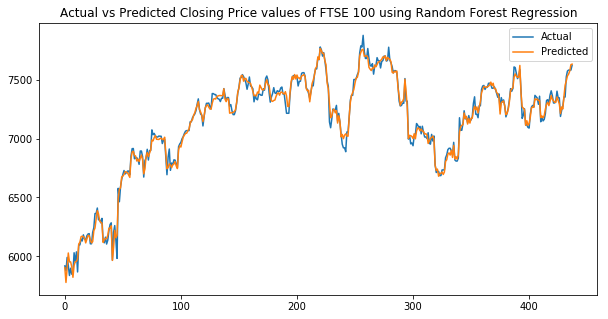

In [242]:
rf_predicted_test_set[['Actual','Predicted']].plot(figsize = (10,5))
plt.title('Actual vs Predicted Closing Price values of FTSE 100 using Random Forest Regression')

<b><u>Comments</u></b>
<br>
The Random Forest Regression model follows the upward trend of the FTSE 100 close price. Providing better way to predict. The RF model  has a R2 statistic of 0.99689 indicating that the model has overfitted.